# **Final Project**

In [846]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## **Downloading the data**

### Importing the dataset in a pandas dataframe

In [876]:
data = pd.read_csv("C:\\Users\\Sofiane\\Desktop\\M1I2A\\Techniques d'apprentissage\\Projet finale\\Data\\dengue_features_train.csv")
labels = pd.read_csv("C:\\Users\\Sofiane\\Desktop\\M1I2A\\Techniques d'apprentissage\\Projet finale\\Data\\dengue_labels_train.csv")

In [877]:
data.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [878]:
X_numerics = data.select_dtypes(include=["int64", "float64"]).values
X_str = data.select_dtypes(include=["object"]).values
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
cat_cols = data.select_dtypes(include=["object", "string"]).columns
data.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

## **Data cleaning**

**In this section we are going to clean and prepare our data for prediction using the following steps**
- The first step is to code the string values, which means we are going to transform the object or the string values into numerical values
- The second step, is to check is there's any missing values in the dataset, if it's the case we gonna use a strategy to replace those missing values
- The last step is to analyse the data and prepare them for model to be trained

### **Code the week_start_date column** 

Since this column represente a timestamp for each observation per week, we must find a way to transform this column into numeric value because it's too important for the prediction.

- The first approach we can use is to encoding using the OneHotEncoder, but it doesn't fit because we got more than 1000 date, so we gonna have more than 1000 columns, and that's impossible because we gonna explose the number of features without any effecienty

- The second approach is to devide this column into columns that's can contain useful information and coordination with the data to have a better prediction.

So here we are going to use the second approach to save the more useful information for prediction

In [879]:
df = data.copy()
df['total_cases'] = labels.iloc[:,-1].values
df["week_start_date"] = pd.to_datetime(df["week_start_date"])

df["year"] = df["week_start_date"].dt.year

df["time_index"] = (
    df["week_start_date"] - df["week_start_date"].min()
).dt.days // 7


df["lag_1"] = df["total_cases"].shift(1)
df["lag_2"] = df["total_cases"].shift(2)
df["lag_4"] = df["total_cases"].shift(4)
df["lag_52"] = df["total_cases"].shift(52)
df = df.drop(columns=["week_start_date"])


### **Type of each column**

In [880]:
df.dtypes

city                                      object
year                                       int32
weekofyear                                 int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c  

### **Separing the labels and the data** 

In [881]:
y_final = df['total_cases'].values
X_final = df.drop(columns=["total_cases"]).values
y = labels.iloc[:,-1].values

### **Code the city column** 

For the city column, we can use either the OneHotEncoding or the labelEncoder, because we got only two different values (sj, iq).
- If we use onehotencoder we are going to have 2 more columns [10 for sj and 01 for iq]
- If we use labelencoder we are going to have only one column [1 for sj, 2 for iq]

Since we are going to use some models which can be affected by labelencoder, so we are going to the onehotencoder in this case

In [882]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_final = np.array(ct.fit_transform(X_final))

In [883]:
X_final = X_final[:,1:]

### **Pie Chart for City Name**

Text(0.5, 1.0, 'Pie Chart for City Names')

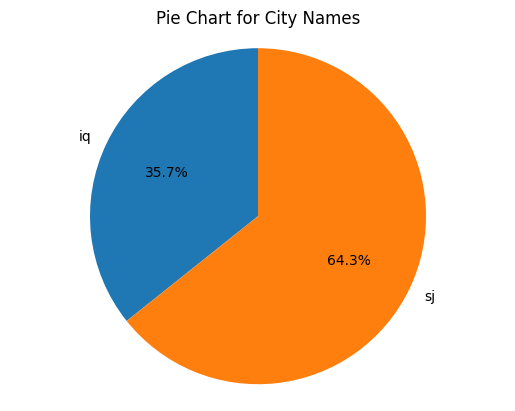

In [884]:
unique_values, counts = np.unique(X_final[:,0], return_counts=True)
indexes = ['iq', 'sj']

plt.pie(
    counts,
    labels=indexes,
    autopct='%1.1f%%',
    startangle=90
)
plt.axis('equal') 
plt.title("Pie Chart for City Names")




In [885]:
df

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,time_index,lag_1,lag_2,lag_4,lag_52
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,6.900000,29.4,20.0,16.0,4,0,NaN,NaN,NaN,NaN
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,6.371429,31.7,22.2,8.6,5,1,4.0,NaN,NaN,NaN
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,6.485714,32.2,22.8,41.4,4,2,5.0,4.0,NaN,NaN
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,6.771429,33.3,23.3,4.0,3,3,4.0,5.0,NaN,NaN
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,9.371429,35.0,23.9,5.8,6,4,3.0,4.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,...,11.933333,35.4,22.4,27.0,5,1047,6.0,7.0,4.0,2.0
1452,iq,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,...,10.500000,34.7,21.7,36.6,8,1048,5.0,6.0,2.0,3.0
1453,iq,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,...,6.900000,32.2,19.2,7.4,1,1049,8.0,5.0,7.0,3.0
1454,iq,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,...,8.733333,31.2,21.0,16.0,1,1050,1.0,8.0,6.0,5.0


In [886]:
columns_cleaning = list(df.columns)
idx = columns_cleaning.index("city")
columns_cleaning.pop(idx)
columns_cleaning.insert(idx, "sj")
idx = columns_cleaning.index("total_cases")
columns_cleaning.pop(idx)

'total_cases'

### **Taking care of missing data**

#### **First let's check if we have any missing values**

In [888]:
missing_values = pd.DataFrame(X_final).isna().sum()

In [889]:
missing_values.shape

(28,)

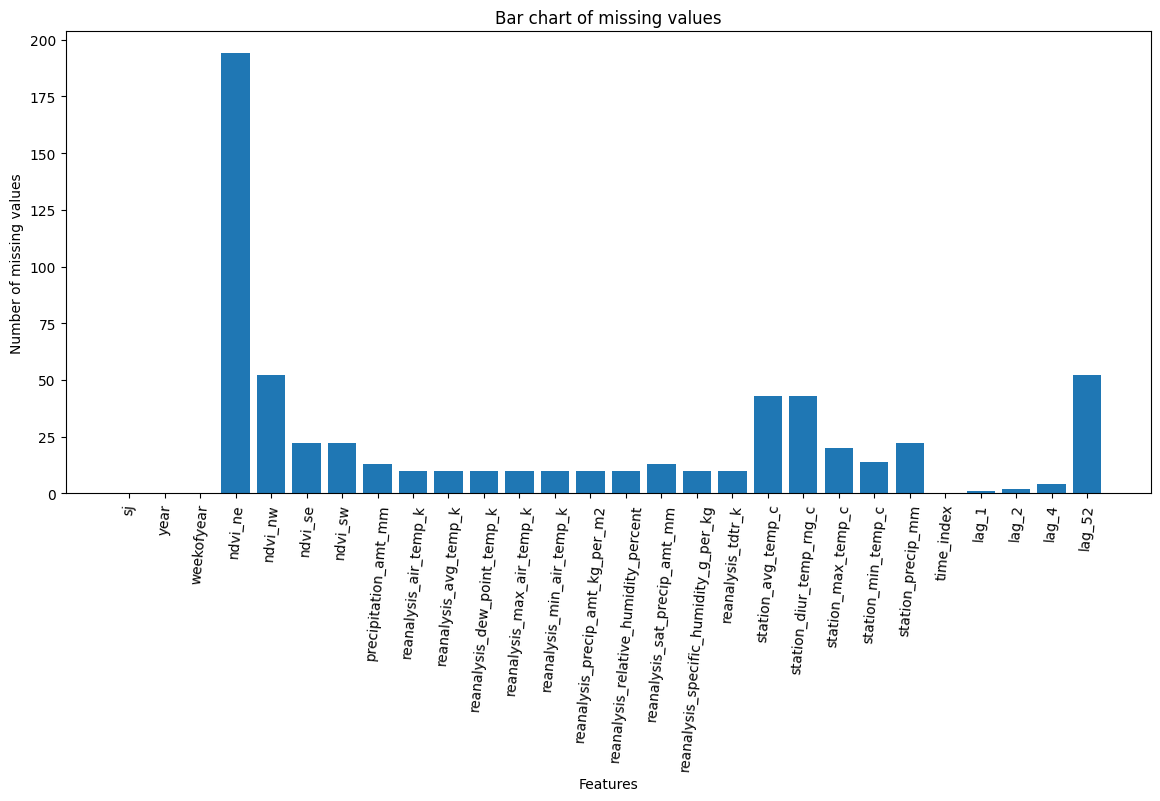

In [890]:
plt.figure(figsize=(14, 6))
plt.bar(columns_cleaning, missing_values)
plt.xticks(rotation=85)  # rotation des labels
plt.title("Bar chart of missing values")
plt.xlabel("Features")
plt.ylabel("Number of missing values")
plt.show()


- The dataset have some missing values, so we can't really show the boxplot for each feature.
- To resolve that, we must first replace those missing values, then we can show our box plot, and detect the outliers

To replace the missing data, we are going to use the mean strategy so we can balance the data

In [894]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_final)
X_final = imputer.transform(X_final)

In [895]:
X_final

array([[1.00e+00, 1.99e+03, 1.80e+01, ..., 2.47e+01, 2.47e+01, 2.54e+01],
       [1.00e+00, 1.99e+03, 1.90e+01, ..., 2.47e+01, 2.47e+01, 2.54e+01],
       [1.00e+00, 1.99e+03, 2.00e+01, ..., 4.00e+00, 2.47e+01, 2.54e+01],
       ...,
       [0.00e+00, 2.01e+03, 2.30e+01, ..., 5.00e+00, 7.00e+00, 3.00e+00],
       [0.00e+00, 2.01e+03, 2.40e+01, ..., 8.00e+00, 6.00e+00, 5.00e+00],
       [0.00e+00, 2.01e+03, 2.50e+01, ..., 1.00e+00, 5.00e+00, 2.00e+00]],
      shape=(1456, 28))

Now we confirme if we still have any missing values

In [896]:
dataframe = pd.DataFrame(X_final).isna().sum()

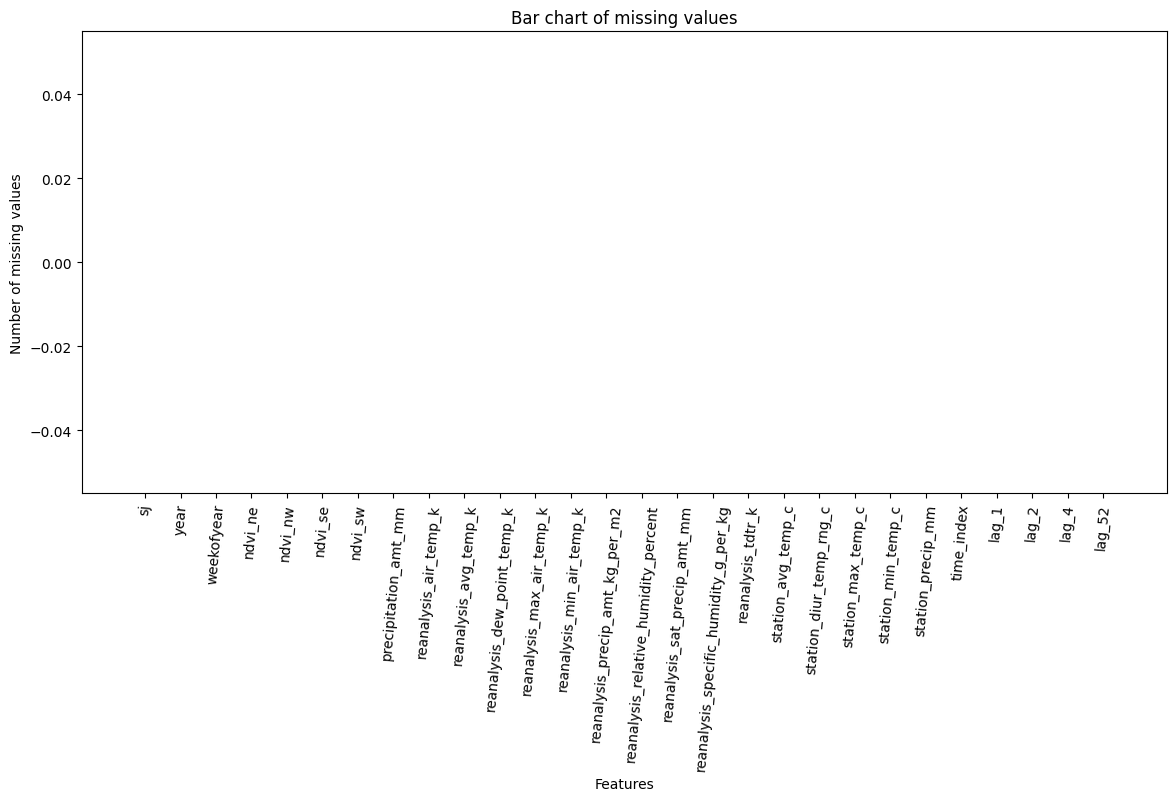

In [897]:
plt.figure(figsize=(14, 6))
plt.bar(columns_cleaning, dataframe)
plt.xticks(rotation=85)  # rotation des labels
plt.title("Bar chart of missing values")
plt.xlabel("Features")
plt.ylabel("Number of missing values")
plt.show()

### **Histogram for the distribution of each feature**

In [898]:
X_final

array([[1.00e+00, 1.99e+03, 1.80e+01, ..., 2.47e+01, 2.47e+01, 2.54e+01],
       [1.00e+00, 1.99e+03, 1.90e+01, ..., 2.47e+01, 2.47e+01, 2.54e+01],
       [1.00e+00, 1.99e+03, 2.00e+01, ..., 4.00e+00, 2.47e+01, 2.54e+01],
       ...,
       [0.00e+00, 2.01e+03, 2.30e+01, ..., 5.00e+00, 7.00e+00, 3.00e+00],
       [0.00e+00, 2.01e+03, 2.40e+01, ..., 8.00e+00, 6.00e+00, 5.00e+00],
       [0.00e+00, 2.01e+03, 2.50e+01, ..., 1.00e+00, 5.00e+00, 2.00e+00]],
      shape=(1456, 28))

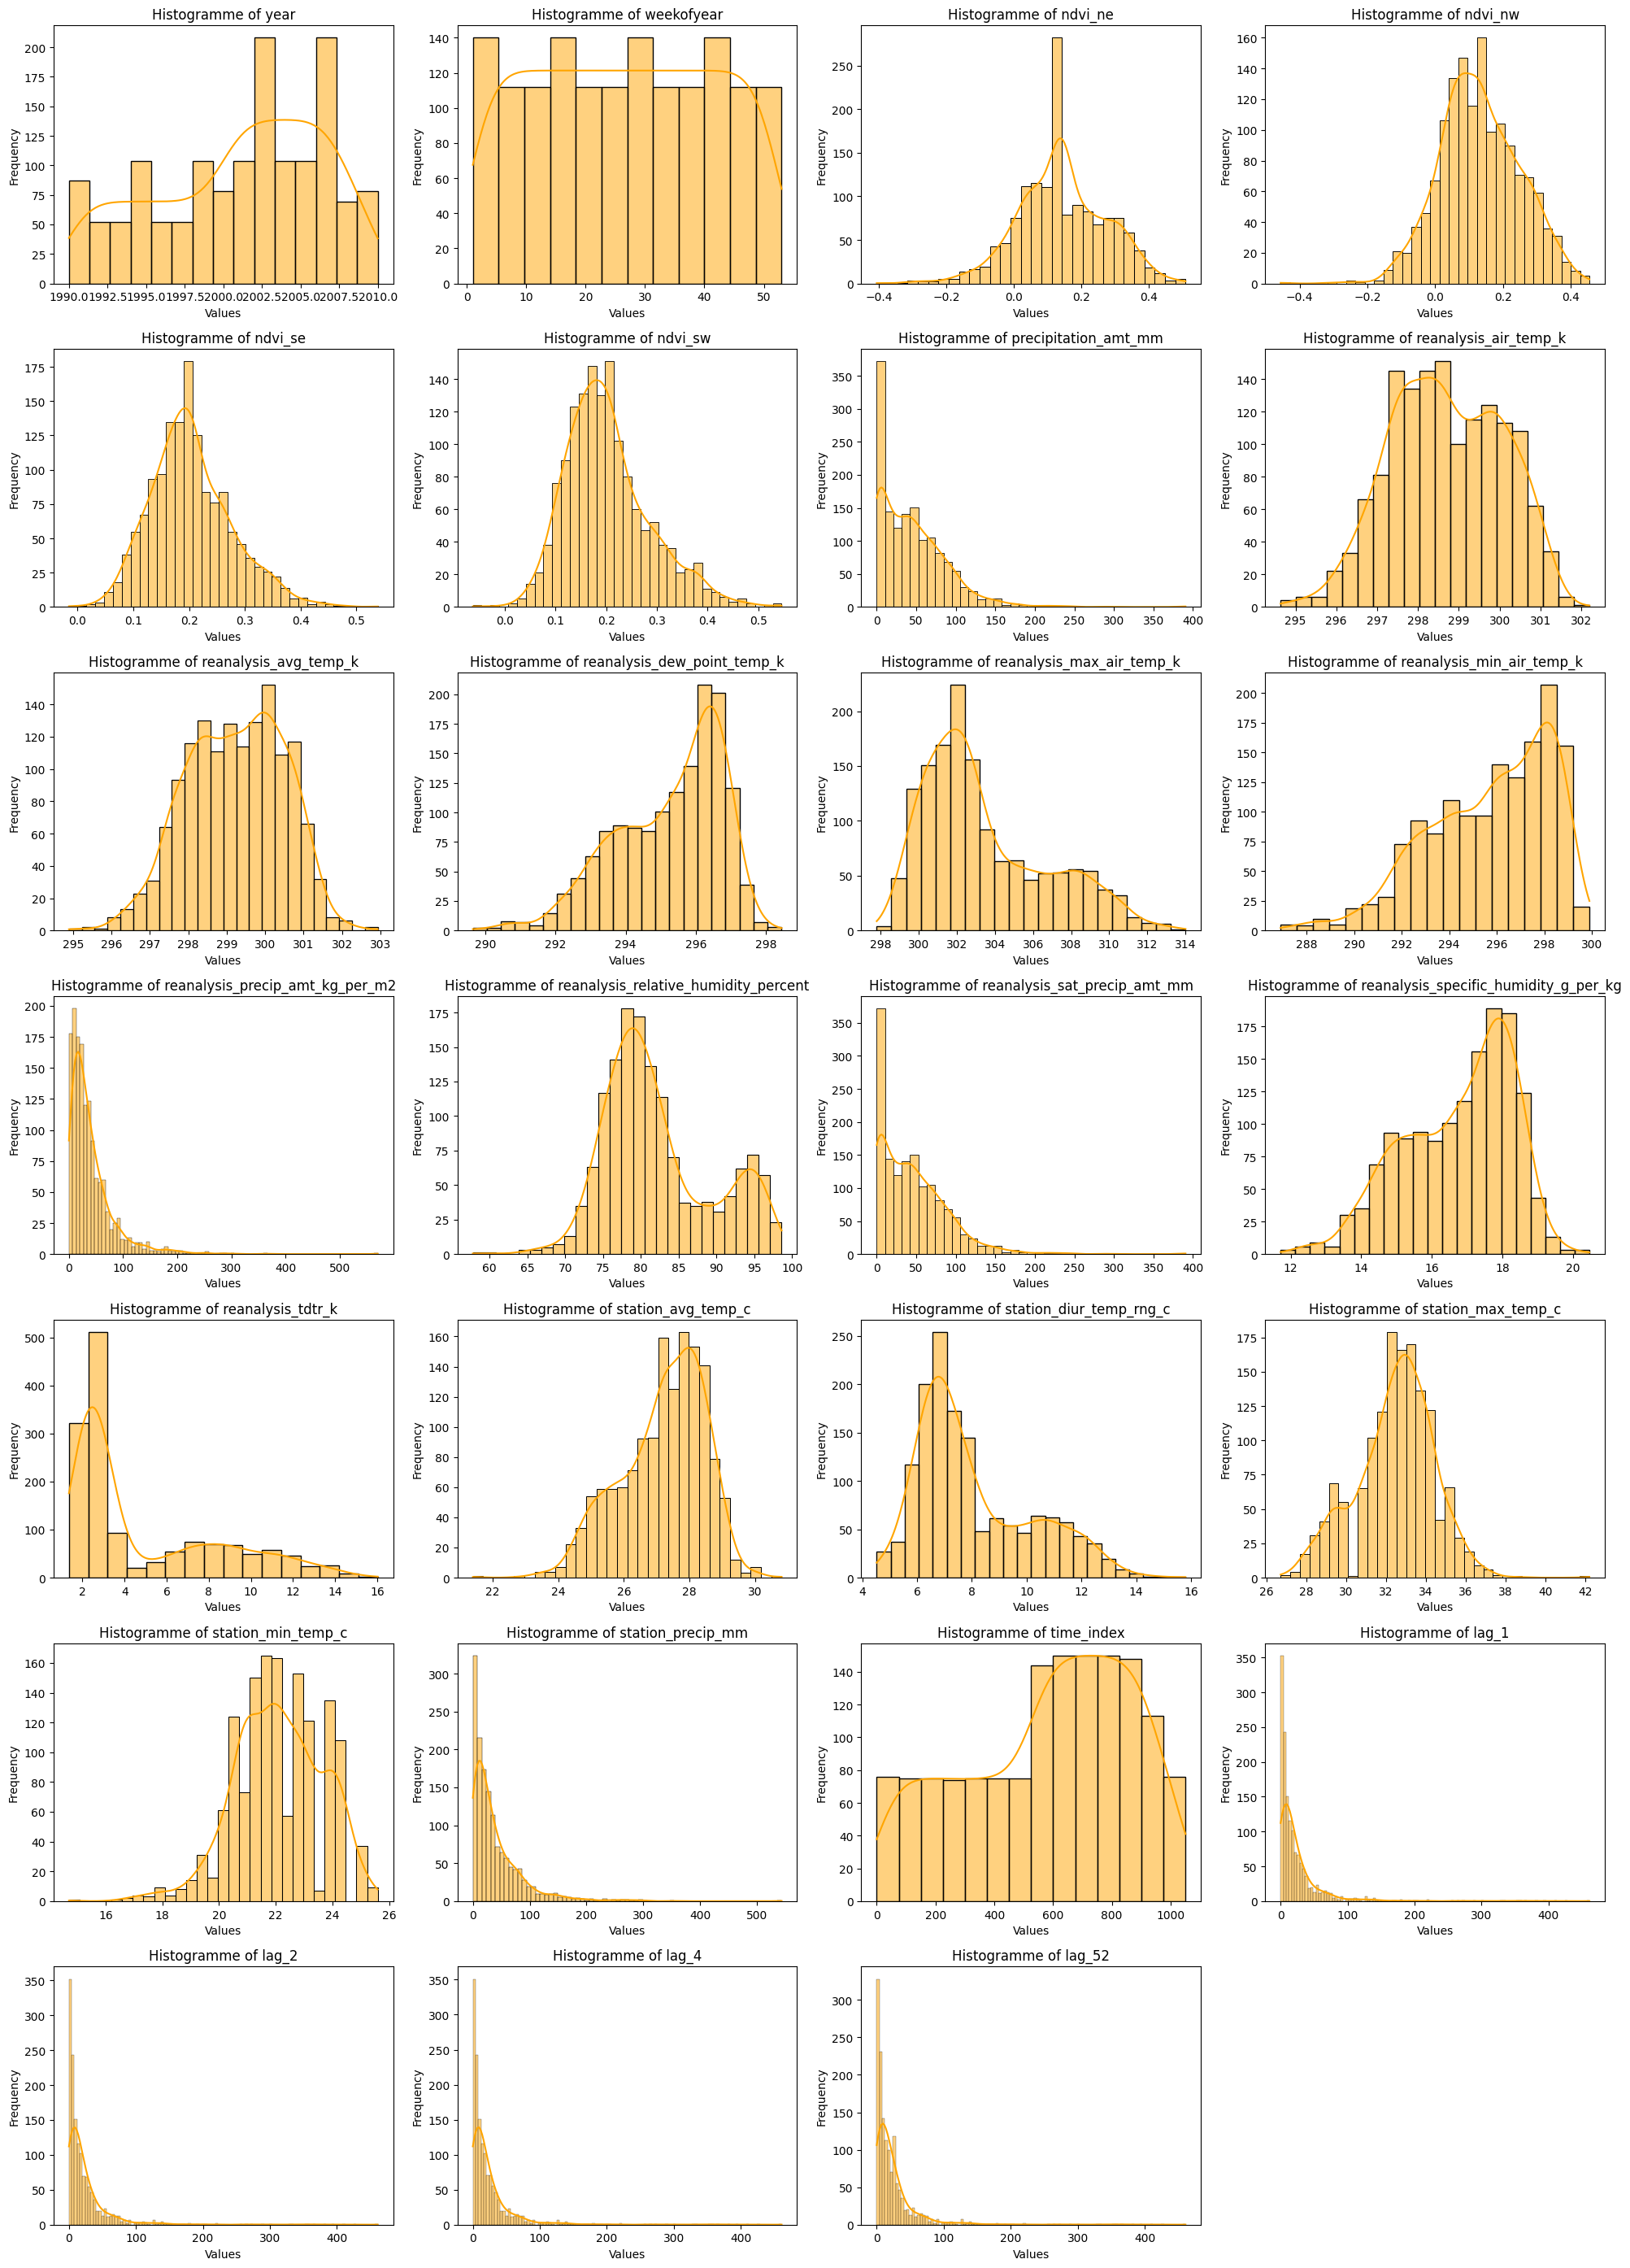

In [1143]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

num_features = X_final.shape[1]

cols = 4
rows = math.ceil(num_features / cols) 

plt.figure(figsize=(5*cols, 4*rows))  

for i in range(1, num_features):
    plt.subplot(rows, cols, i)  
    sns.histplot(X_final[:, i], bins='auto', kde=True, color='orange')  
    plt.title(f"Histogramme of {columns_cleaning[i]}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [901]:
X_df = pd.DataFrame(X_final)
X_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.642857,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,...,27.185783,8.059328,32.452437,22.102150,39.326360,583.713599,24.689347,24.705640,24.733471,25.378205
std,0.479322,5.408314,15.019437,0.130827,0.117835,0.073299,0.083266,43.519806,1.357730,1.257372,...,1.273108,2.096879,1.945806,1.566475,47.095179,281.475581,43.592628,43.588201,43.581561,43.432566
min,0.000000,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,...,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1997.000000,13.750000,0.055625,0.051367,0.155625,0.144718,9.960000,297.665000,298.264286,...,26.328571,6.528571,31.100000,21.100000,8.850000,364.750000,5.000000,5.000000,5.000000,5.000000
50%,1.000000,2002.000000,26.500000,0.142294,0.128067,0.196998,0.190993,38.710000,298.662143,299.267857,...,27.385714,7.385714,32.800000,22.200000,24.450000,630.000000,12.000000,12.000000,12.000000,13.000000
75%,1.000000,2005.000000,39.250000,0.229292,0.212325,0.247021,0.246082,70.047500,299.827500,300.207143,...,28.128571,9.500000,33.900000,23.300000,53.600000,812.000000,28.000000,28.000000,28.000000,28.000000
max,1.000000,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,...,30.800000,15.800000,42.200000,25.600000,543.300000,1051.000000,461.000000,461.000000,461.000000,461.000000


In [902]:
columns_for_box_plot = columns_cleaning.copy()

In [904]:
data_for_box_plots = pd.DataFrame(X_final)
data_for_box_plots.columns = columns_for_box_plot

df_melted = data_for_box_plots.melt(var_name='Feature', value_name='Value')



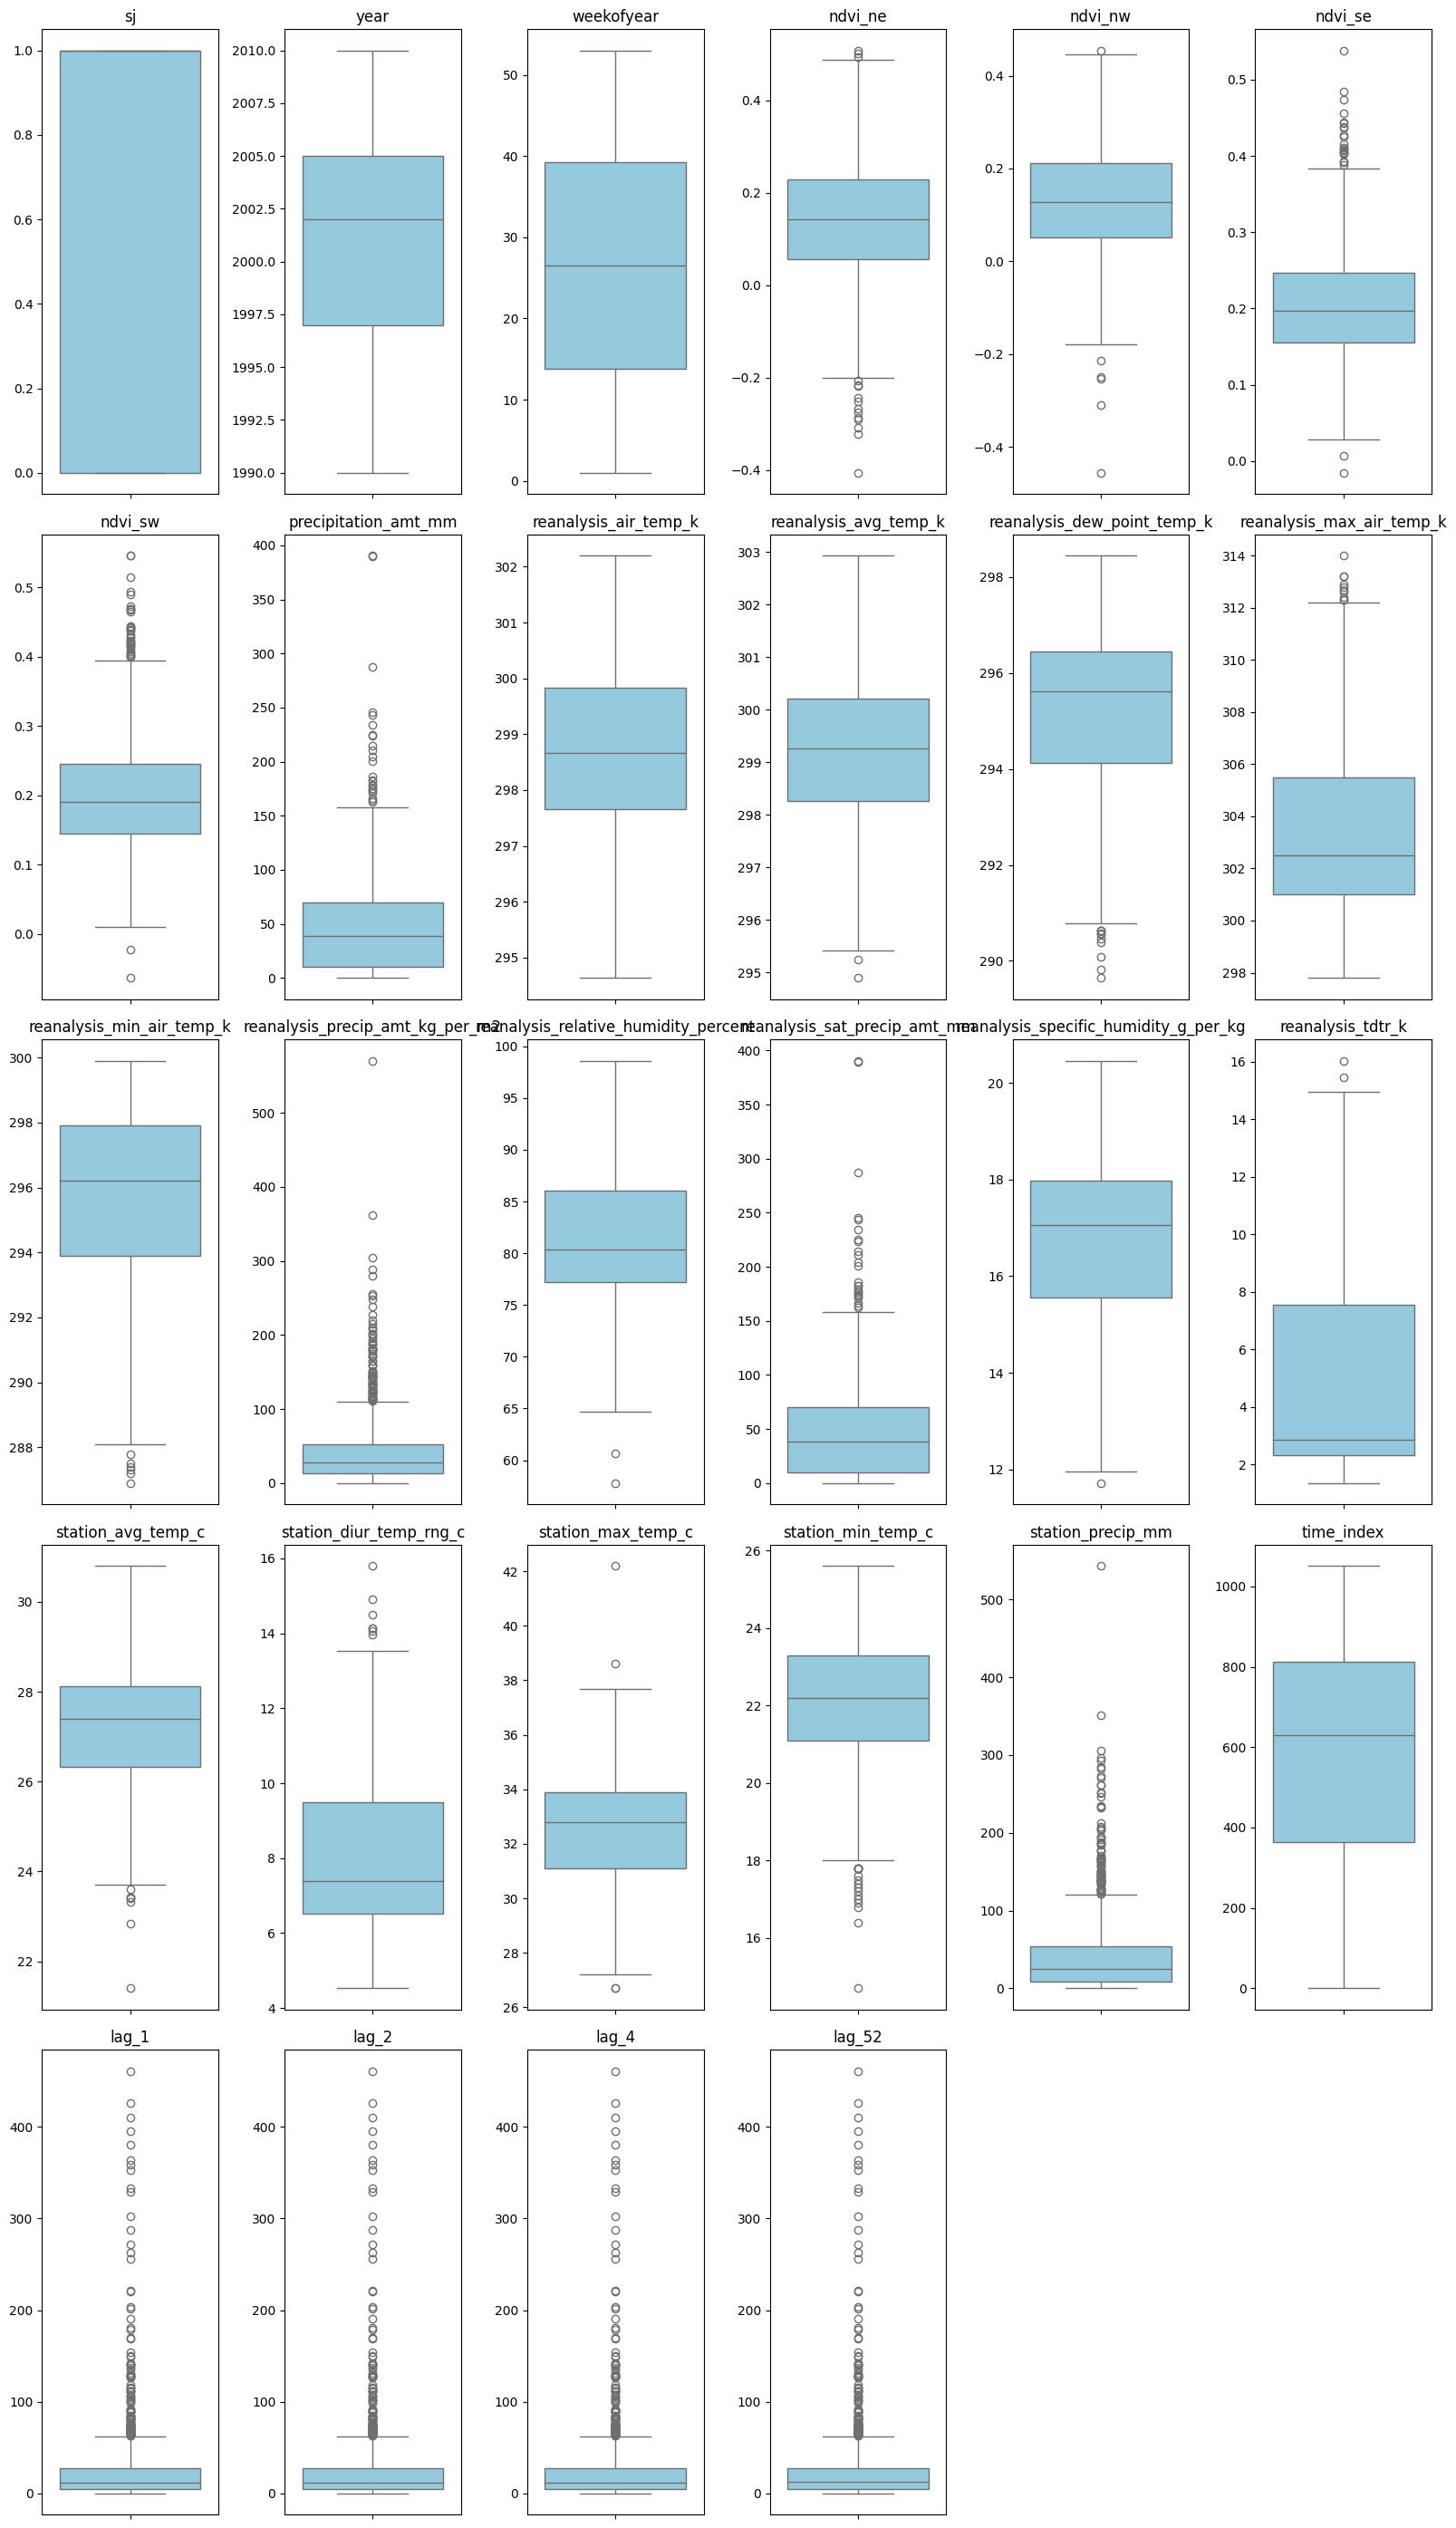

In [1152]:
num_features = data_for_box_plots.shape[1]
rows = 5
cols = 6

fig, axes = plt.subplots(rows, cols, figsize=(16, 28))  # big figure

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(data_for_box_plots.columns):
    sns.boxplot(y=data_for_box_plots[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col)
    axes[i].set_ylabel("")  # optional: remove y-label for cleaner look

# Remove any unused subplots (if num_features < rows*cols)
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### **Correlation matrix**

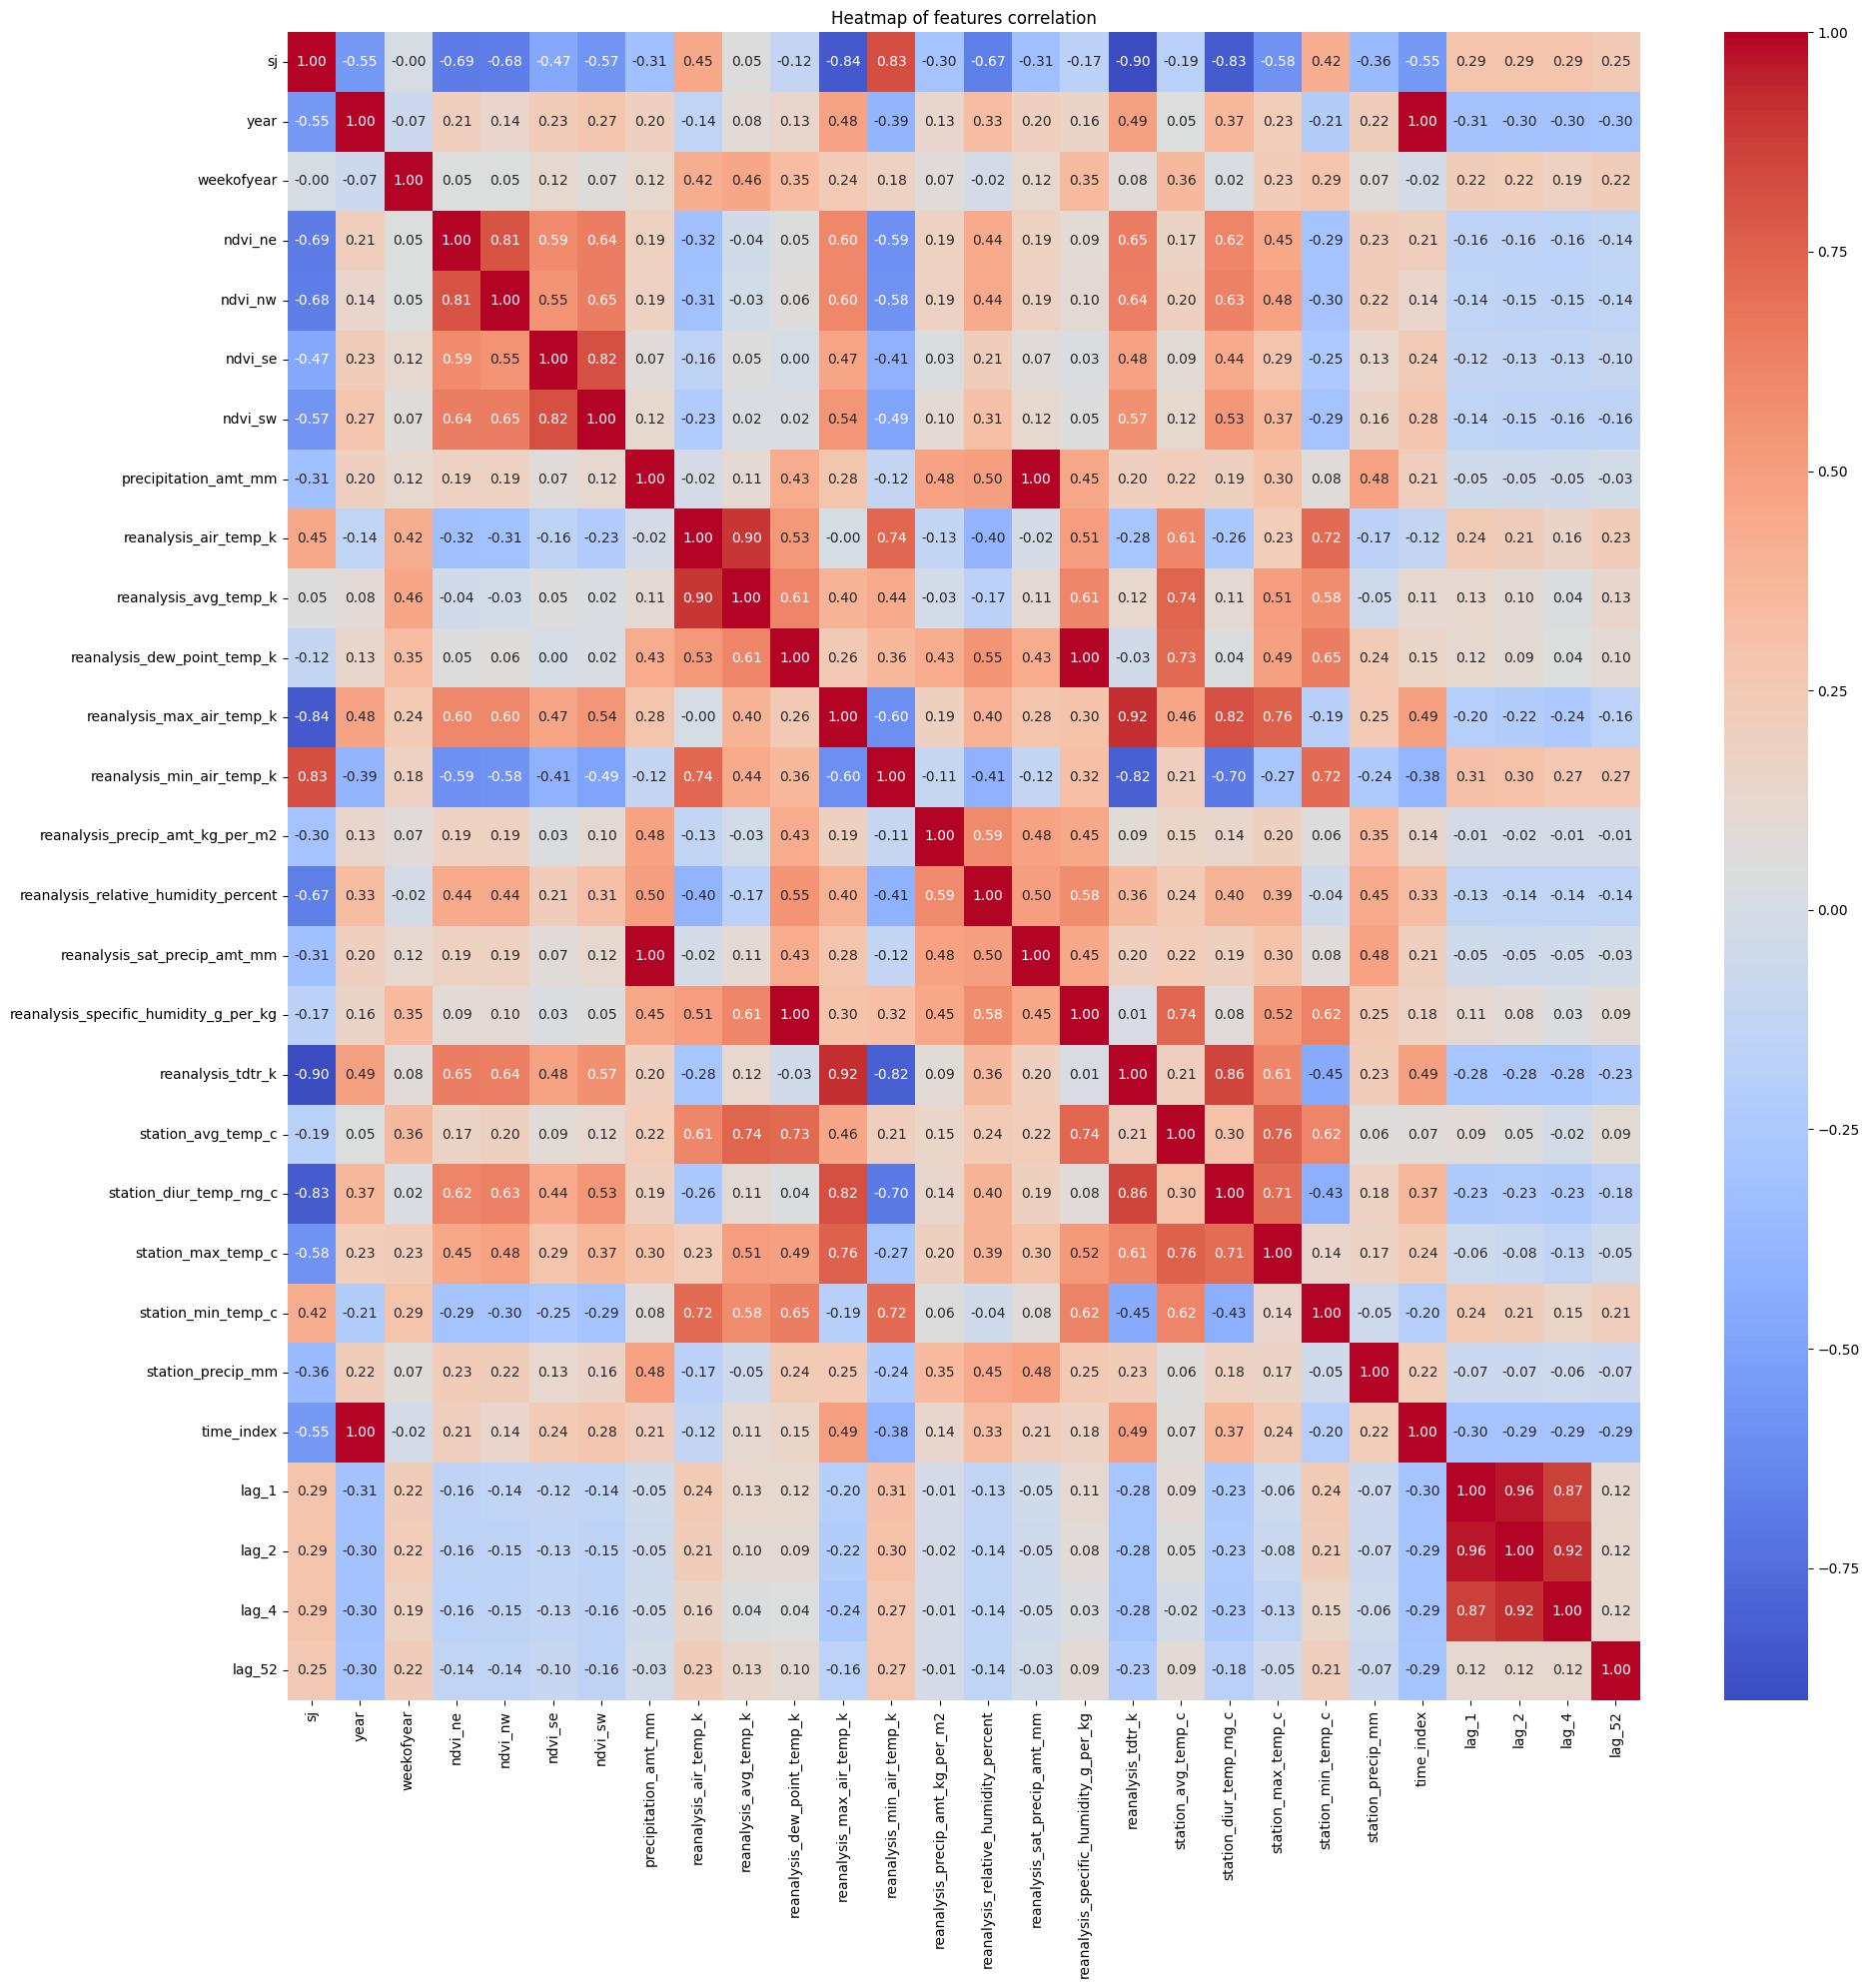

In [906]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(X_final, columns=columns_cleaning)

corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of features correlation")
plt.tight_layout()
plt.show()


Based on the correlation matrix we noticed that's :
-   Features like :
    -   **ndvi_ne, ndvi_nw, ndvi_se, ndvi_sw** have a strong correlation.
    -   **reanalysis_air_temp_k et reanalysis_avg_temp_k** same have a strong correlation with a 0.8 value.
    -   **station_avg_temp_c, station_max_temp_c, station_min_temp_c** have from modern to strong correlation.
    -   **Lag** features have a strong correlation too.

**So A lot of redundancy → PCA will be useful to reduce the dimensionality and combine this information into a few main components.**

But as we know we can't apply PCA before applying feature scaling, so we must first apply the scale for all the data, then apply the PCA strategy to reduce the dimension of the dataset

There's some algorithms that's don't need to apply feature scaling and PCA, like random forest, and decision trees, because it's already handles correlation, and since it based on the splits it must reduce impurty

### **Splitting the data into train and test set**

In [932]:
cities = labels["city"].values         
total_cases = labels["total_cases"].values 
y = np.column_stack((cities, total_cases))
y[:, 0] = (y[:, 0] == "sj").astype(int)


In [933]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.2, random_state = 0)

### **Applying the feature scaling for some algorithms who require that the data need to be scaled** 

In [934]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train[:, 1:])
X_test_scaled = sc.transform(X_test[:, 1:])
X_train_scaled = np.column_stack((X_train[:, 0], X_train_scaled))
X_test_scaled = np.column_stack((X_test[:, 0], X_test_scaled))


In [938]:
X_train_sj = X_train[X_train[:, 0] == 1]
X_train_sj_scaled = X_train_scaled[X_train_scaled[:, 0] == 1]
X_train_iq = X_train[X_train[:, 0] == 0]
X_train_iq_scaled = X_train_scaled[X_train_scaled[:, 0] == 0]

X_test_sj = X_test[X_test[:, 0] == 1]
X_test_sj_scaled = X_test_scaled[X_test_scaled[:, 0] == 1]
X_test_iq = X_test[X_test[:, 0] == 0]
X_test_iq_scaled = X_test_scaled[X_test_scaled[:, 0] == 0]

y_train_sj = y_train[y_train[:, 0] == 1][:,1]
y_test_sj = y_test[y_test[:, 0] == 1][:,1]

y_train_iq = y_train[y_train[:, 0] == 0][:,1]
y_test_iq = y_test[y_test[:, 0] == 0][:,1]

## **Training models**

According to the distribution of each feature we did in the last section, the models that we are going to use are :
-   **Gradient-boost**
-   **XGBoost**
-   **Random forest**
-   **Neural networks**
-   **Neural networks + PCA**

In [944]:
models_results = {
    "Gradient boosting for sj" : [],
    "Gradient boosting for iq" : [],

    "XGBoost for sj" : [],
    "XGBoost for iq" : [],

    "Random forest for sj" : [],
    "Random forest for iq" : [],

    "MLP Regressor for sj" : [],
    "MLP Regressor for iq" : [],
    
    "ANN for sj" : [],
    "ANN for iq" : []
}

**Pipline :**
-   First, we are going to use a gridsearch to find the optimal values of each parameter
-   Second, according to the results of gridsearch, we are going to train our model based on that
-   Last, we are going to evaluate our model by calculating the mean squared error (MSE) and the precision of the model and apply the cross validation to see the real accuracy or score of the model

### **Gradient boosting**

#### **For sj city**

#### **GridSearch**

In [960]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid_boosting = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 4, 6, 10],
    "loss" : ['absolute_error'],
    "criterion" : ['friedman_mse', 'squared_error']
}

model = GradientBoostingRegressor(random_state=42)



In [947]:
grid_gradientBoosting_sj = GridSearchCV(
    model,
    param_grid_boosting,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid_gradientBoosting_sj.fit(X_train_sj, y_train_sj)
print(grid_gradientBoosting_sj.best_params_)
print("Best Accuracy: {:.2f} %".format(grid_gradientBoosting_sj.best_score_*100))

{'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 4, 'n_estimators': 500}
Best Accuracy: 87.57 %


In [948]:
gradient_boosting_model_sj = grid_gradientBoosting_sj.best_estimator_

#### **Cross Validation**

In [949]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = gradient_boosting_model_sj, X = X_train_sj, y = y_train_sj, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 87.79 %
Standard Deviation: 5.90 %


#### **Prediction for y_test**

In [951]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_boosting_sj = gradient_boosting_model_sj.predict(X_test_sj)

#### **Add the results into the table**

In [952]:
models_results["Gradient boosting for sj"] = [mean_absolute_error(y_test_sj, y_pred_boosting_sj), r2_score(y_test_sj, y_pred_boosting_sj), accuracies.mean()*100]

In [ ]:
len(X_train_iq)

In [ ]:
len(y_train_iq)

#### **For iq city**

In [961]:
grid_gradientBoosting_iq = GridSearchCV(
    model,
    param_grid_boosting,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid_gradientBoosting_iq.fit(X_train_iq, y_train_iq)
print(grid_gradientBoosting_iq.best_params_)
print("Best Accuracy: {:.2f} %".format(grid_gradientBoosting_iq.best_score_*100))

{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'absolute_error', 'max_depth': 10, 'n_estimators': 500}
Best Accuracy: 56.38 %


In [962]:
gradient_boosting_model_iq = grid_gradientBoosting_iq.best_estimator_

In [963]:
from sklearn.model_selection import cross_val_score
accuracies_GB_iq = cross_val_score(estimator = gradient_boosting_model_iq, X = X_train_iq, y = y_train_iq, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_GB_iq.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_GB_iq.std()*100))

Accuracy: 54.81 %
Standard Deviation: 15.18 %


In [966]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_boosting_iq = gradient_boosting_model_iq.predict(X_test_iq)

In [967]:
models_results["Gradient boosting for iq"] = [mean_absolute_error(y_test_iq, y_pred_boosting_iq), r2_score(y_test_iq, y_pred_boosting_iq), accuracies_GB_iq.mean()*100]

### **XGBoost**

#### **GridSearch**

In [ ]:
from xgboost import XGBRegressor
param_grid_xgboost = {
    'xgb__n_estimators': [100, 300, 500],
    'xgb__learning_rate': [0.0001, 0.001, 0.01, 0.05, 0.1],
    'xgb__max_depth': [3, 4, 5],
    'xgb__subsample': [0.7, 0.8, 1.0],
    'xgb__colsample_bytree': [0.7, 0.8, 1.0],
    'xgb__gamma': [0, 0.1, 0.2],
    "xgb__objective" : ["reg:absoluteerror"]
}

 
grid_xgboost = GridSearchCV(
    XGBRegressor(random_state = 42),
    param_grid_boosting,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

#### **For sj City**

In [970]:
grid_xgboost.fit(X_train_sj, y_train_sj)
print(grid_xgboost.best_params_)
print("Best Accuracy: {:.2f} %".format(grid_xgboost.best_score_*100))

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 4, 'n_estimators': 200}
Best Accuracy: 90.99 %


In [971]:
xgboost_model_sj = grid_xgboost.best_estimator_

#### **Cross validation**

In [972]:
from sklearn.model_selection import cross_val_score
accuracies_xgboost_sj = cross_val_score(estimator = xgboost_model_sj, X = X_train_sj, y = y_train_sj, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_xgboost_sj.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_xgboost_sj.std()*100))

Accuracy: 88.41 %
Standard Deviation: 7.86 %


#### **Prediction for y_test**

In [977]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_xgboost_sj = xgboost_model_sj.predict(X_test_sj)

#### **Add the results into the table**

In [979]:
models_results["XGBoost for sj"] = [mean_absolute_error(y_test_sj, y_pred_xgboost_sj), r2_score(y_test_sj, y_pred_xgboost_sj), accuracies_xgboost_sj.mean()*100]

#### **For iq city**

In [1081]:
grid_xgboost.fit(X_train_iq, y_train_iq)
print(grid_xgboost.best_params_)
print("Best Accuracy: {:.2f} %".format(grid_xgboost.best_score_*100))

{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 2, 'n_estimators': 500}
Best Accuracy: 51.88 %


In [1082]:
xgboost_model_iq = grid_xgboost.best_estimator_

In [1083]:
from sklearn.model_selection import cross_val_score
accuracies_xgboost_iq = cross_val_score(estimator = xgboost_model_iq, X = X_train_iq, y = y_train_iq, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_xgboost_iq.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_xgboost_iq.std()*100))

Accuracy: 50.93 %
Standard Deviation: 13.62 %


In [1084]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_xgboost_iq = xgboost_model_iq.predict(X_test_iq)

In [1085]:
models_results["XGBoost for iq"] = [mean_absolute_error(y_test_iq, y_pred_xgboost_iq), r2_score(y_test_iq, y_pred_xgboost_iq), accuracies_xgboost_iq.mean()*100]

### **Random Forest**

#### **GridSearch**

#### **For sj city**

In [1000]:
from sklearn.ensemble import RandomForestRegressor

param_grid_random_forest = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", 0.8],
    
}


grid_random_forest = GridSearchCV(
    RandomForestRegressor(random_state = 42),
    param_grid_random_forest,
    cv=5,
    scoring='r2',
    n_jobs=-1
)


In [1001]:
grid_random_forest.fit(X_train_sj, y_train_sj)
print(grid_random_forest.best_params_)
print("Best Accuracy: {:.2f} %".format(grid_random_forest.best_score_*100))

{'max_depth': 15, 'max_features': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Accuracy: 87.38 %


In [1003]:
random_forest_model_sj = grid_random_forest.best_estimator_

#### **Cross validation**

In [1004]:
accuracies_random_forest_sj = cross_val_score(estimator = random_forest_model_sj, X = X_train_sj, y = y_train_sj, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_random_forest_sj.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_random_forest_sj.std()*100))

Accuracy: 87.12 %
Standard Deviation: 9.98 %


#### **Prediction for y_test**

In [1007]:
y_pred_random_forest_sj = random_forest_model_sj.predict(X_test_sj)

#### **Add the results into the table**

In [1008]:
models_results["Random forest for sj"] = [mean_absolute_error(y_test_sj, y_pred_random_forest_sj), r2_score(y_test_sj, y_pred_random_forest_sj), accuracies_random_forest_sj.mean()*100]

#### **For iq city**

In [1010]:
grid_random_forest.fit(X_train_iq, y_train_iq)
print(grid_random_forest.best_params_)
print("Best Accuracy: {:.2f} %".format(grid_random_forest.best_score_*100))

{'max_depth': 20, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 57.76 %


In [1011]:
random_forest_model_iq = grid_random_forest.best_estimator_

In [1012]:
accuracies_random_forest_iq = cross_val_score(estimator = random_forest_model_iq, X = X_train_iq, y = y_train_iq, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_random_forest_iq.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_random_forest_iq.std()*100))

Accuracy: 52.67 %
Standard Deviation: 14.79 %


In [1013]:
y_pred_random_forest_iq = random_forest_model_iq.predict(X_test_iq)

In [1014]:
models_results["Random forest for iq"] = [mean_absolute_error(y_test_iq, y_pred_random_forest_iq), r2_score(y_test_iq, y_pred_random_forest_iq), accuracies_random_forest_iq.mean()*100]

### **Neural networks**

In this section we are going to train some neural networks algorithms such us :
- **Classic MLP**
- **Simple ANN Architecture with pytorch**

#### **Classic MLP for sj city**

We are going to train the mlp on several iterations, then we will observe the loss funtion

c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the

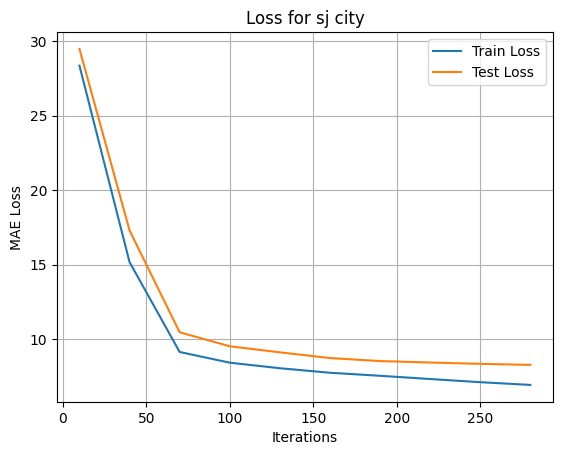

In [1017]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
train_losses = []
test_losses = []
train_r2 = []
test_r2 = []
for i in range(10, 300, 30):
    model = MLPRegressor(
        hidden_layer_sizes=(28, 46),
        max_iter=i,
        random_state=42,
    )
    model.fit(X_train_sj_scaled, y_train_sj)

    y_train_pred = model.predict(X_train_sj_scaled)
    y_test_pred = model.predict(X_test_sj_scaled)

    train_losses.append(mean_absolute_error(y_train_sj, y_train_pred))
    test_losses.append(mean_absolute_error(y_test_sj, y_test_pred))
    train_r2.append(r2_score(y_train_sj, y_train_pred))
    test_r2.append(r2_score(y_test_sj, y_test_pred))

plt.plot(range(10, 300, 30), train_losses, label="Train Loss")
plt.plot(range(10, 300, 30), test_losses, label="Test Loss")
plt.xlabel("Iterations")
plt.ylabel("MAE Loss")
plt.title("Loss for sj city")
plt.legend()
plt.grid(True)
plt.show()


As we are seeing in the graph, the model MLPRegressor overfit for our scaled data

#### **Applying the cross validation**

In [1018]:
accuracies_MLP_sj = cross_val_score(estimator = model, X = X_train_sj, y = y_train_sj, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_MLP_sj.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_MLP_sj.std()*100))

c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (280) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (280) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (280) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (280) reached and 

Accuracy: 88.29 %
Standard Deviation: 5.23 %


c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (280) reached and the optimization hasn't converged yet.
  warnings.warn(


In [1027]:
models_results["MLP Regressor sj"] = [np.min(np.array(test_losses)), test_r2[np.argmin(np.array(test_losses))], accuracies_MLP_sj.mean()*100]

#### **MLP Regressor for iq**

c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the

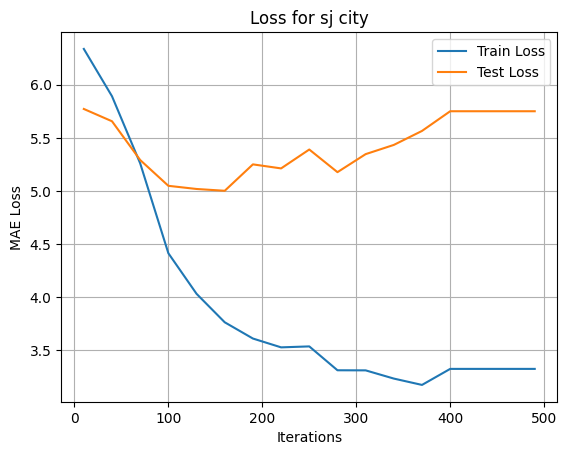

In [1031]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
train_losses = []
test_losses = []
train_r2 = []
test_r2 = []
for i in range(10, 500, 30):
    model = MLPRegressor(
        hidden_layer_sizes=(28, 46),
        max_iter=i,
        random_state=42,
    )
    model.fit(X_train_iq_scaled, y_train_iq)

    y_train_pred = model.predict(X_train_iq_scaled)
    y_test_pred = model.predict(X_test_iq_scaled)

    train_losses.append(mean_absolute_error(y_train_iq, y_train_pred))
    test_losses.append(mean_absolute_error(y_test_iq, y_test_pred))
    train_r2.append(r2_score(y_train_iq, y_train_pred))
    test_r2.append(r2_score(y_test_iq, y_test_pred))

plt.plot(range(10, 500, 30), train_losses, label="Train Loss")
plt.plot(range(10, 500, 30), test_losses, label="Test Loss")
plt.xlabel("Iterations")
plt.ylabel("MAE Loss")
plt.title("Loss for sj city")
plt.legend()
plt.grid(True)
plt.show()


In [1032]:
accuracies_MLP_iq = cross_val_score(estimator = model, X = X_train_iq, y = y_train_iq, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_MLP_iq.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_MLP_iq.std()*100))

Accuracy: -94.86 %
Standard Deviation: 40.31 %


In [1035]:
models_results["MLP Regressor iq"] = [np.min(np.array(test_losses)), test_r2[np.argmin(np.array(test_losses))], accuracies_MLP_iq.mean()*100]

#### **Simple ANN Architecture with pytorch**

**Pipeline:**
-   First, we are going to create tensors for each x_train, x_test, y_train, and y_test
-   Second, we create dataloader for train and test so we can train the model using pytorch
-   Finally, we evaluate the model according to MAE, and observing the loss function to ensure that's we don't have an overfitting

In [1048]:
import torch
import torch.nn as nn

class ANNModel(nn.Module):
    def __init__(self, input_size, hidden_size=46, output_size=1):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_size),
        )

    def forward(self, x):
        return self.net(x)

In [1049]:
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor_sj = torch.tensor(X_train_sj_scaled, dtype=torch.float32)
y_train_tensor_sj = torch.tensor(y_train_sj.astype(np.float32), dtype=torch.float32)

train_dataset_sj = TensorDataset(X_train_tensor_sj, y_train_tensor_sj)

train_loader_sj = DataLoader(
    train_dataset_sj,
    batch_size=64,
    shuffle=True
)


In [1050]:
X_test_tensor_sj = torch.tensor(X_test_sj_scaled, dtype=torch.float32)
y_test_tensor_sj = torch.tensor(y_test_sj.astype(np.float32), dtype=torch.float32)

test_dataset_sj = TensorDataset(X_test_tensor_sj, y_test_tensor_sj)

val_loader_sj = DataLoader(
    test_dataset_sj,
    batch_size=64,
    shuffle=True
)

In [1051]:
X_train_tensor_iq = torch.tensor(X_train_iq_scaled, dtype=torch.float32)
y_train_tensor_iq = torch.tensor(y_train_iq.astype(np.float32), dtype=torch.float32)

train_dataset_iq = TensorDataset(X_train_tensor_iq, y_train_tensor_iq)

train_loader_iq = DataLoader(
    train_dataset_iq,
    batch_size=64,
    shuffle=True
)

In [1052]:
X_test_tensor_iq = torch.tensor(X_test_iq_scaled, dtype=torch.float32)
y_test_tensor_iq = torch.tensor(y_test_iq.astype(np.float32), dtype=torch.float32)

test_dataset_iq = TensorDataset(X_test_tensor_iq, y_test_tensor_iq)

val_loader_iq = DataLoader(
    test_dataset_iq,
    batch_size=64,
    shuffle=True
)

#### **For sj city**

In [1053]:
input_size = X_train_tensor_sj.shape[1]

In [1054]:
param_grid = {
    "hidden_size": [32, 46, 64],
    "lr": [1e-3, 3e-4],
    "weight_decay": [0.0, 1e-3, 1e-2],
}

def build_model(input_size=28, hidden_size=32):
    return ANNModel(
        input_size=input_size,
        hidden_size=hidden_size
    )


#### **Def of a function that's can evaluate our model**

In [1055]:
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for inputs, targets in loader:
            inputs = inputs.float()
            targets = targets.float().view(-1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            total_loss += loss.item()
            all_targets.append(targets)
            all_outputs.append(outputs)

    avg_loss = total_loss / len(loader)

    y_true = torch.cat(all_targets)
    y_pred = torch.cat(all_outputs)

    ss_res = torch.sum((y_true - y_pred) ** 2)
    ss_tot = torch.sum((y_true - y_true.mean()) ** 2)

    r2 = 0.0 if ss_tot == 0 else (1 - ss_res / ss_tot).item()

    return avg_loss, r2


#### **Cross Validation function**

Since we are working with neural networks, i'm going to create a function to simulate the cross validation for neural networks

In [1056]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import KFold


def cross_validate_ann(
    X,
    y,
    model,
    optimizer,
    criterion,
    k_folds=5,
    epochs=50,
    batch_size=64,
    device="cpu"
):
    

    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    fold_mae = []
    fold_r2 = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f"\nFold {fold + 1}/{k_folds}")

        
        X_train = torch.tensor(X[train_idx], dtype=torch.float32).to(device)
        y_train = torch.tensor(y[train_idx], dtype=torch.float32).to(device)

        X_val = torch.tensor(X[val_idx], dtype=torch.float32).to(device)
        y_val = torch.tensor(y[val_idx], dtype=torch.float32).to(device)

        train_loader = DataLoader(
            TensorDataset(X_train, y_train),
            batch_size=batch_size,
            shuffle=True
        )

        val_loader = DataLoader(
            TensorDataset(X_val, y_val),
            batch_size=batch_size,
            shuffle=False
        )

        # model = model_class(**model_params).to(device)

        for epoch in range(epochs):
            model.train()
            for inputs, targets in train_loader:
                targets = targets.view(-1, 1)

                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)

                loss.backward()
                optimizer.step()

        val_loss, val_r2_score = evaluate(model, val_loader, criterion)

        fold_mae.append(val_loss)
        fold_r2.append(val_r2_score)

        print(f"MAE={val_loss:.4f}, R²={val_r2_score:.4f}")

    return {
        "mae_mean": np.mean(fold_mae),
        "mae_std": np.std(fold_mae),
        "r2_mean": np.mean(fold_r2),
        "r2_std": np.std(fold_r2)
    }


#### **Def of a function to simulate a train over parameters**

In [1057]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=50):
    for epoch in range(epochs):
        model.train()
        for inputs, targets in train_loader:
            inputs = inputs.float()
            targets = targets.float().view(-1, 1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            loss.backward()
            optimizer.step()

    val_loss, val_r2 = evaluate(model, val_loader, criterion)
    return val_loss, val_r2


#### **GridSearch for sj city**

In [1058]:
best_score = float("inf")
best_params = None
best_model = None

for hidden_size in param_grid["hidden_size"]:
    for lr in param_grid["lr"]:
        for wd in param_grid["weight_decay"]:

            print(f"Testing: hidden={hidden_size}, lr={lr}, wd={wd}")

            model = build_model(input_size, hidden_size)
            criterion = nn.L1Loss()
            optimizer = torch.optim.Adam(
                model.parameters(),
                lr=lr,
                weight_decay=wd
            )

            val_loss, val_r2 = train_model(
                model,
                train_loader_sj,
                val_loader_sj,
                criterion,
                optimizer,
                epochs=50
            )

            if val_loss < best_score:
                best_score = val_loss
                best_params = {
                    "hidden_size": hidden_size,
                    "lr": lr,
                    "weight_decay": wd
                }
                best_model = model

            print(f"→ Val MAE={val_loss:.4f}, R²={val_r2:.4f}")
print("Best configuration:")
print(best_params)
print("Best validation MAE:", best_score)


Testing: hidden=32, lr=0.001, wd=0.0
→ Val MAE=8.2654, R²=0.9264
Testing: hidden=32, lr=0.001, wd=0.001
→ Val MAE=8.5604, R²=0.9172
Testing: hidden=32, lr=0.001, wd=0.01
→ Val MAE=8.4424, R²=0.9183
Testing: hidden=32, lr=0.0003, wd=0.0
→ Val MAE=9.7492, R²=0.8817
Testing: hidden=32, lr=0.0003, wd=0.001
→ Val MAE=10.4060, R²=0.8616
Testing: hidden=32, lr=0.0003, wd=0.01
→ Val MAE=9.7677, R²=0.8763
Testing: hidden=46, lr=0.001, wd=0.0
→ Val MAE=8.5379, R²=0.9229
Testing: hidden=46, lr=0.001, wd=0.001
→ Val MAE=8.2079, R²=0.9286
Testing: hidden=46, lr=0.001, wd=0.01
→ Val MAE=8.4170, R²=0.9209
Testing: hidden=46, lr=0.0003, wd=0.0
→ Val MAE=9.8913, R²=0.8728
Testing: hidden=46, lr=0.0003, wd=0.001
→ Val MAE=9.7304, R²=0.8819
Testing: hidden=46, lr=0.0003, wd=0.01
→ Val MAE=9.5287, R²=0.8861
Testing: hidden=64, lr=0.001, wd=0.0
→ Val MAE=8.4418, R²=0.9221
Testing: hidden=64, lr=0.001, wd=0.001
→ Val MAE=8.2039, R²=0.9261
Testing: hidden=64, lr=0.001, wd=0.01
→ Val MAE=8.2893, R²=0.9222
Tes

#### **Training for sj city**

In [1059]:
modelAnn = ANNModel(input_size=28, hidden_size=64)
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(modelAnn.parameters(), lr=0.001, weight_decay=1e-3)

In [1060]:
train_losses = []
val_losses = []
train_r2 = []
val_r2 = []
num_epochs = 100
for epoch in range(num_epochs):
    modelAnn.train()
    running_loss = 0.0

    for inputs, targets in train_loader_sj:
        inputs = inputs.float()
        targets = targets.float().view(-1, 1)

        optimizer.zero_grad()
        outputs = modelAnn(inputs)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_sj)
    train_losses.append(train_loss)
    _, train_r2_score = evaluate(modelAnn, train_loader_sj, criterion)
    train_r2.append(train_r2_score)

    val_loss, val_r2_score = evaluate(modelAnn, val_loader_sj, criterion)
    val_losses.append(val_loss)
    val_r2.append(val_r2_score)

    print(
        f"Epoch {epoch+1}: "
        f"Train Loss={train_loss:.4f}, "
        f"Val Loss={val_loss:.4f}, "
        f"Val R²={val_r2_score:.4f}"
    )


Epoch 1: Train Loss=33.8332, Val Loss=34.9068, Val R²=-0.4166
Epoch 2: Train Loss=33.5181, Val Loss=33.8896, Val R²=-0.3828
Epoch 3: Train Loss=31.5906, Val Loss=30.4193, Val R²=-0.2804
Epoch 4: Train Loss=27.4123, Val Loss=25.4358, Val R²=-0.0498
Epoch 5: Train Loss=22.2990, Val Loss=23.0681, Val R²=0.2322
Epoch 6: Train Loss=19.9048, Val Loss=20.7041, Val R²=0.3724
Epoch 7: Train Loss=17.4723, Val Loss=18.5040, Val R²=0.5075
Epoch 8: Train Loss=15.3632, Val Loss=16.1550, Val R²=0.6404
Epoch 9: Train Loss=12.7832, Val Loss=14.3682, Val R²=0.7609
Epoch 10: Train Loss=10.8943, Val Loss=11.9474, Val R²=0.8356
Epoch 11: Train Loss=9.5667, Val Loss=10.7814, Val R²=0.8583
Epoch 12: Train Loss=9.1092, Val Loss=10.3987, Val R²=0.8643
Epoch 13: Train Loss=9.0361, Val Loss=10.3129, Val R²=0.8678
Epoch 14: Train Loss=8.7862, Val Loss=10.1980, Val R²=0.8726
Epoch 15: Train Loss=8.6774, Val Loss=10.0555, Val R²=0.8745
Epoch 16: Train Loss=8.5615, Val Loss=10.0145, Val R²=0.8774
Epoch 17: Train Los

#### **Applying Cross-Validation for sj city**

In [1064]:
results_ann_cv = cross_validate_ann(X_train_sj_scaled, y_train_sj.astype(np.float32), modelAnn,optimizer=optimizer, criterion = criterion,k_folds=10,epochs=50, batch_size=64)


Fold 1/10
MAE=8.5810, R²=0.8956

Fold 2/10
MAE=6.1512, R²=0.9589

Fold 3/10
MAE=4.8194, R²=0.9709

Fold 4/10
MAE=5.0547, R²=0.9773

Fold 5/10
MAE=4.2458, R²=0.9697

Fold 6/10
MAE=4.0537, R²=0.8858

Fold 7/10
MAE=3.2749, R²=0.9459

Fold 8/10
MAE=3.0926, R²=0.9816

Fold 9/10
MAE=2.6778, R²=0.9917

Fold 10/10
MAE=4.2458, R²=0.9931


##### **Loss function for sj city**

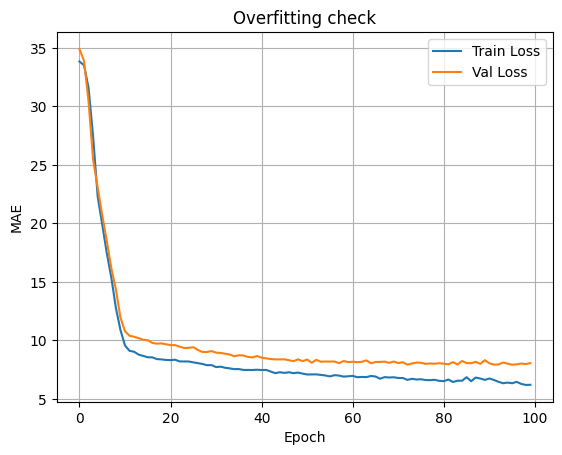

In [1065]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Overfitting check")
plt.show()


According to the plot, well the neural network we built, gave us a great accuracy and does not overfit

In [1066]:
models_results["ANN for sj"] = [np.min(val_losses), val_r2[np.argmin(val_losses)], results_ann_cv['r2_mean']]

#### **For iq city**

#### **GridSearch for iq city**

In [1069]:
best_score = float("inf")
best_params = None
best_model = None

for hidden_size in param_grid["hidden_size"]:
    for lr in param_grid["lr"]:
        for wd in param_grid["weight_decay"]:

            print(f"Testing: hidden={hidden_size}, lr={lr}, wd={wd}")

            model = build_model(input_size, hidden_size)
            criterion = nn.L1Loss()
            optimizer = torch.optim.Adam(
                model.parameters(),
                lr=lr,
                weight_decay=wd
            )

            val_loss, val_r2 = train_model(
                model,
                train_loader_iq,
                val_loader_iq,
                criterion,
                optimizer,
                epochs=50
            )

            if val_loss < best_score:
                best_score = val_loss
                best_params = {
                    "hidden_size": hidden_size,
                    "lr": lr,
                    "weight_decay": wd
                }
                best_model = model

            print(f"→ Val MAE={val_loss:.4f}, R²={val_r2:.4f}")
print("Best configuration:")
print(best_params)
print("Best validation MAE:", best_score)


Testing: hidden=32, lr=0.001, wd=0.0
→ Val MAE=4.5398, R²=-0.0246
Testing: hidden=32, lr=0.001, wd=0.001
→ Val MAE=4.5467, R²=-0.0792
Testing: hidden=32, lr=0.001, wd=0.01
→ Val MAE=4.5062, R²=0.1362
Testing: hidden=32, lr=0.0003, wd=0.0
→ Val MAE=4.5327, R²=0.0645
Testing: hidden=32, lr=0.0003, wd=0.001
→ Val MAE=4.7994, R²=0.1118
Testing: hidden=32, lr=0.0003, wd=0.01
→ Val MAE=4.9947, R²=0.0788
Testing: hidden=46, lr=0.001, wd=0.0
→ Val MAE=4.7668, R²=0.0337
Testing: hidden=46, lr=0.001, wd=0.001
→ Val MAE=4.7150, R²=-0.0150
Testing: hidden=46, lr=0.001, wd=0.01
→ Val MAE=4.7585, R²=-0.0291
Testing: hidden=46, lr=0.0003, wd=0.0
→ Val MAE=4.8039, R²=0.1147
Testing: hidden=46, lr=0.0003, wd=0.001
→ Val MAE=4.6893, R²=0.1125
Testing: hidden=46, lr=0.0003, wd=0.01
→ Val MAE=4.7814, R²=0.1214
Testing: hidden=64, lr=0.001, wd=0.0
→ Val MAE=4.7536, R²=-0.1607
Testing: hidden=64, lr=0.001, wd=0.001
→ Val MAE=4.5893, R²=-0.0179
Testing: hidden=64, lr=0.001, wd=0.01
→ Val MAE=4.4382, R²=0.052

#### **Training for iq city**

In [1087]:
modelAnn = ANNModel(input_size=28, hidden_size=64)
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(modelAnn.parameters(), lr=0.001, weight_decay=1e-2)

In [1088]:
train_losses = []
val_losses = []
train_r2 = []
val_r2 = []
num_epochs = 100
for epoch in range(num_epochs):
    modelAnn.train()
    running_loss = 0.0

    for inputs, targets in train_loader_iq:
        inputs = inputs.float()
        targets = targets.float().view(-1, 1)

        optimizer.zero_grad()
        outputs = modelAnn(inputs)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_iq)
    train_losses.append(train_loss)
    _, train_r2_score = evaluate(modelAnn, train_loader_iq, criterion)
    train_r2.append(train_r2_score)

    val_loss, val_r2_score = evaluate(modelAnn, val_loader_iq, criterion)
    val_losses.append(val_loss)
    val_r2.append(val_r2_score)

    print(
        f"Epoch {epoch+1}: "
        f"Train Loss={train_loss:.4f}, "
        f"Val Loss={val_loss:.4f}, "
        f"Val R²={val_r2_score:.4f}"
    )


Epoch 1: Train Loss=7.8428, Val Loss=6.8660, Val R²=-0.5149
Epoch 2: Train Loss=7.5674, Val Loss=7.0103, Val R²=-0.4875
Epoch 3: Train Loss=7.5479, Val Loss=6.5412, Val R²=-0.4415
Epoch 4: Train Loss=7.2089, Val Loss=5.9890, Val R²=-0.3537
Epoch 5: Train Loss=6.6861, Val Loss=5.6141, Val R²=-0.2096
Epoch 6: Train Loss=6.5194, Val Loss=5.0763, Val R²=-0.0448
Epoch 7: Train Loss=6.1702, Val Loss=5.4511, Val R²=0.0246
Epoch 8: Train Loss=6.2156, Val Loss=5.4062, Val R²=0.0100
Epoch 9: Train Loss=5.8104, Val Loss=5.1959, Val R²=-0.0135
Epoch 10: Train Loss=5.8101, Val Loss=4.7411, Val R²=-0.0075
Epoch 11: Train Loss=5.6760, Val Loss=4.8869, Val R²=0.0311
Epoch 12: Train Loss=5.9296, Val Loss=4.9100, Val R²=0.0505
Epoch 13: Train Loss=5.6770, Val Loss=4.9222, Val R²=0.0336
Epoch 14: Train Loss=5.6227, Val Loss=4.9421, Val R²=0.0643
Epoch 15: Train Loss=5.3641, Val Loss=4.8445, Val R²=0.0681
Epoch 16: Train Loss=5.2342, Val Loss=4.7729, Val R²=0.0763
Epoch 17: Train Loss=5.3468, Val Loss=4.7

#### **Cross validation for iq city**

In [1089]:
results_ann_cv_iq = cross_validate_ann(X_train_iq_scaled, y_train_iq.astype(np.float32), modelAnn,optimizer=optimizer, criterion = criterion,k_folds=10,epochs=50, batch_size=64)


Fold 1/10
MAE=2.9715, R²=0.8051

Fold 2/10
MAE=2.4110, R²=0.6081

Fold 3/10
MAE=2.3824, R²=0.7992

Fold 4/10
MAE=1.9972, R²=0.7013

Fold 5/10
MAE=3.2249, R²=0.7800

Fold 6/10
MAE=1.0881, R²=0.9613

Fold 7/10
MAE=1.6677, R²=0.8849

Fold 8/10
MAE=0.9017, R²=0.9578

Fold 9/10
MAE=2.9185, R²=0.6160

Fold 10/10
MAE=0.9457, R²=0.9672


#### **Loss function for iq city**

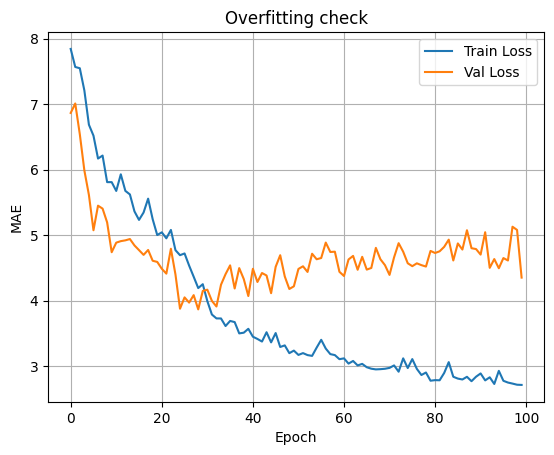

In [1090]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Overfitting check")
plt.show()


In [1092]:
models_results["ANN for iq"] = [np.min(val_losses), val_r2[np.argmin(val_losses)], results_ann_cv_iq['r2_mean']]

### **Applying PCA for neural networks, and observing the results**

In [1094]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

X_train_PCA_sj = pca.fit_transform(X_train_sj_scaled)
X_test_PCA_sj = pca.transform(X_test_sj_scaled)

X_train_PCA_iq = pca.fit_transform(X_train_iq_scaled)
X_test_PCA_iq = pca.fit_transform(X_test_iq_scaled)

### **For sj city**

### **Classic MLP Regressor with PCA**

c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the

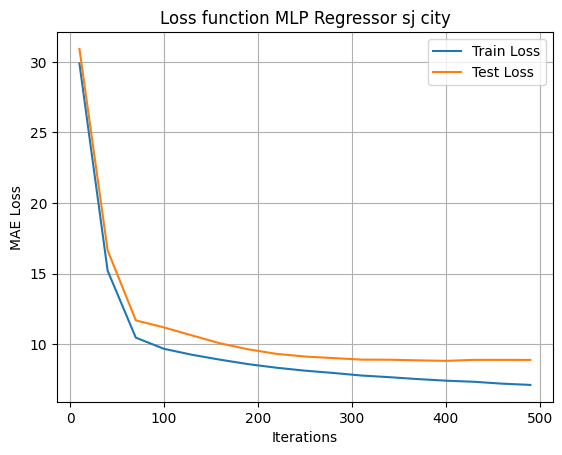

In [1097]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
train_losses = []
test_losses = []
train_r2 = []
test_r2 = []
for i in range(10, 500, 30):
    MLPModel = MLPRegressor(
        hidden_layer_sizes=(28, 46),
        max_iter=i,
        random_state=42,
    )
    MLPModel.fit(X_train_PCA_sj, y_train_sj)

    y_train_sj_pred = MLPModel.predict(X_train_PCA_sj)
    y_test_pred_sj = MLPModel.predict(X_test_PCA_sj)

    train_losses.append(mean_absolute_error(y_train_sj, y_train_sj_pred))
    test_losses.append(mean_absolute_error(y_test_sj, y_test_pred_sj))
    train_r2.append(r2_score(y_train_sj, y_train_sj_pred))
    test_r2.append(r2_score(y_test_sj, y_test_pred_sj))

plt.plot(range(10, 500, 30), train_losses, label="Train Loss")
plt.plot(range(10, 500, 30), test_losses, label="Test Loss")
plt.xlabel("Iterations")
plt.ylabel("MAE Loss")
plt.title("Loss function MLP Regressor sj city")
plt.legend()
plt.grid(True)
plt.show()


Even if it's the same result as the MLPRegressor without Applying PCA, but we noticed that there's some improvement.

In [1098]:
accuracies_MLP_PCA_sj = cross_val_score(estimator = MLPModel, X = X_train_PCA_sj, y = y_train_sj, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_MLP_PCA_sj.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_MLP_PCA_sj.std()*100))

c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and 

Accuracy: 83.60 %
Standard Deviation: 16.02 %


c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(


In [1099]:
models_results["MLP Regressor + PCA for sj"] = [np.min(np.array(test_losses)), test_r2[np.argmin(np.array(test_losses))], accuracies_MLP_PCA_sj.mean()*100]

### **MLP Regressor for iq city**

c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the

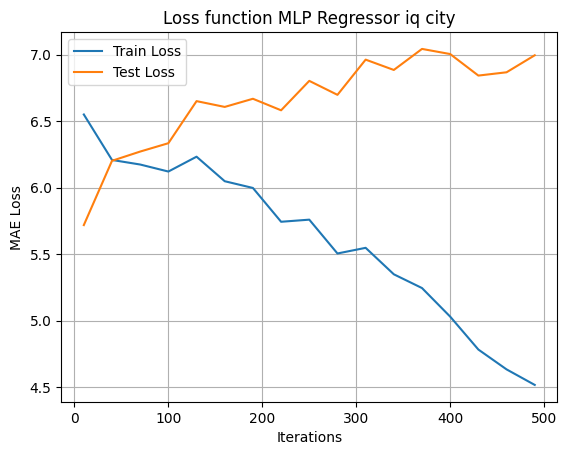

In [1102]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
train_losses = []
test_losses = []
train_r2 = []
test_r2 = []
for i in range(10, 500, 30):
    MLPModel = MLPRegressor(
        hidden_layer_sizes=(28, 46),
        max_iter=i,
        random_state=42,
    )
    MLPModel.fit(X_train_PCA_iq, y_train_iq)

    y_train_iq_pred = MLPModel.predict(X_train_PCA_iq)
    y_test_pred_iq = MLPModel.predict(X_test_PCA_iq)

    train_losses.append(mean_absolute_error(y_train_iq, y_train_iq_pred))
    test_losses.append(mean_absolute_error(y_test_iq, y_test_pred_iq))
    train_r2.append(r2_score(y_train_iq, y_train_iq_pred))
    test_r2.append(r2_score(y_test_iq, y_test_pred_iq))

plt.plot(range(10, 500, 30), train_losses, label="Train Loss")
plt.plot(range(10, 500, 30), test_losses, label="Test Loss")
plt.xlabel("Iterations")
plt.ylabel("MAE Loss")
plt.title("Loss function MLP Regressor iq city")
plt.legend()
plt.grid(True)
plt.show()


In [1103]:
accuracies_MLP_PCA_iq = cross_val_score(estimator = MLPModel, X = X_train_PCA_iq, y = y_train_iq, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_MLP_PCA_iq.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_MLP_PCA_iq.std()*100))

c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and 

Accuracy: -25.17 %
Standard Deviation: 44.12 %


c:\Users\Sofiane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (490) reached and the optimization hasn't converged yet.
  warnings.warn(


In [1104]:
models_results["MLP Regressor + PCA for iq"] = [np.min(np.array(test_losses)), test_r2[np.argmin(np.array(test_losses))], accuracies_MLP_PCA_iq.mean()*100]

### **Simple Neural network after applying PCA**

#### **Creation of a dataloader after appyling PCA**

In [1111]:
from torch.utils.data import TensorDataset, DataLoader

#sj
X_train_tensor_PCA_sj = torch.tensor(X_train_PCA_sj, dtype=torch.float32)

train_dataset_PCA_sj = TensorDataset(X_train_tensor_PCA_sj, y_train_tensor_sj)

train_loader_PCA_sj = DataLoader(
    train_dataset_PCA_sj,
    batch_size=64,
    shuffle=True
)

#iq
X_train_tensor_PCA_iq = torch.tensor(X_train_PCA_iq, dtype=torch.float32)

train_dataset_PCA_iq = TensorDataset(X_train_tensor_PCA_iq, y_train_tensor_iq)

train_loader_PCA_iq = DataLoader(
    train_dataset_PCA_iq,
    batch_size=64,
    shuffle=True
)


In [1112]:
#sj
X_test_tensor_PCA_sj = torch.tensor(X_test_PCA_sj, dtype=torch.float32)

test_dataset_PCA_sj = TensorDataset(X_test_tensor_PCA_sj, y_test_tensor_sj)

val_loader_PCA_sj = DataLoader(
    test_dataset_PCA_sj,
    batch_size=64,
    shuffle=True
)

#iq
X_test_tensor_PCA_iq = torch.tensor(X_test_PCA_iq, dtype=torch.float32)

test_dataset_PCA_iq = TensorDataset(X_test_tensor_PCA_iq, y_test_tensor_iq)

val_loader_PCA_iq = DataLoader(
    test_dataset_PCA_iq,
    batch_size=64,
    shuffle=True
)

### **For sj city**

#### **Training**

In [1113]:
input_size = X_train_tensor_PCA_sj.shape[1]


In [1114]:
best_score = float("inf")
best_params = None
best_model = None

for hidden_size in param_grid["hidden_size"]:
    for lr in param_grid["lr"]:
        for wd in param_grid["weight_decay"]:

            print(f"Testing: hidden={hidden_size}, lr={lr}, wd={wd}")

            model = build_model(input_size, hidden_size)
            criterion = nn.L1Loss()
            optimizer = torch.optim.Adam(
                model.parameters(),
                lr=lr,
                weight_decay=wd
            )

            val_loss, val_r2 = train_model(
                model,
                train_loader_PCA_sj,
                val_loader_PCA_sj,
                criterion,
                optimizer,
                epochs=50
            )

            if val_loss < best_score:
                best_score = val_loss
                best_params = {
                    "hidden_size": hidden_size,
                    "lr": lr,
                    "weight_decay": wd
                }
                best_model = model

            print(f"→ Val MAE={val_loss:.4f}, R²={val_r2:.4f}")
print("Best configuration:")
print(best_params)
print("Best validation MAE:", best_score)


Testing: hidden=32, lr=0.001, wd=0.0
→ Val MAE=9.2857, R²=0.8873
Testing: hidden=32, lr=0.001, wd=0.001
→ Val MAE=9.6592, R²=0.8771
Testing: hidden=32, lr=0.001, wd=0.01
→ Val MAE=9.7949, R²=0.8792
Testing: hidden=32, lr=0.0003, wd=0.0
→ Val MAE=11.7127, R²=0.8460
Testing: hidden=32, lr=0.0003, wd=0.001
→ Val MAE=11.5268, R²=0.8520
Testing: hidden=32, lr=0.0003, wd=0.01
→ Val MAE=11.4637, R²=0.8458
Testing: hidden=46, lr=0.001, wd=0.0
→ Val MAE=9.4864, R²=0.8828
Testing: hidden=46, lr=0.001, wd=0.001
→ Val MAE=9.3888, R²=0.8866
Testing: hidden=46, lr=0.001, wd=0.01
→ Val MAE=9.2474, R²=0.8851
Testing: hidden=46, lr=0.0003, wd=0.0
→ Val MAE=10.7199, R²=0.8601
Testing: hidden=46, lr=0.0003, wd=0.001
→ Val MAE=10.8494, R²=0.8644
Testing: hidden=46, lr=0.0003, wd=0.01
→ Val MAE=10.6259, R²=0.8663
Testing: hidden=64, lr=0.001, wd=0.0
→ Val MAE=9.4105, R²=0.8864
Testing: hidden=64, lr=0.001, wd=0.001
→ Val MAE=9.5929, R²=0.8826
Testing: hidden=64, lr=0.001, wd=0.01
→ Val MAE=9.2746, R²=0.884

In [1116]:
modelAnn_PCA_sj = ANNModel(input_size=input_size, hidden_size=46)
criterion_PCA_sj = nn.L1Loss()
optimizer_PCA_sj = torch.optim.Adam(modelAnn_PCA_sj.parameters(), lr=0.001, weight_decay=0.01)

In [1117]:
train_losses = []
val_losses = []
train_r2 = []
val_r2 = []
num_epochs = 100
for epoch in range(num_epochs):
    modelAnn_PCA_sj.train()
    running_loss = 0.0

    for inputs, targets in train_loader_PCA_sj:
        inputs = inputs.float()
        targets = targets.float().view(-1, 1)

        optimizer_PCA_sj.zero_grad()
        outputs = modelAnn_PCA_sj(inputs)
        loss = criterion_PCA_sj(outputs, targets)

        loss.backward()
        optimizer_PCA_sj.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_PCA_sj)
    train_losses.append(train_loss)
    _, train_r2_score = evaluate(modelAnn_PCA_sj, train_loader_PCA_sj, criterion_PCA_sj)
    train_r2.append(train_r2_score)

    val_loss, val_r2_score = evaluate(modelAnn_PCA_sj, val_loader_PCA_sj, criterion_PCA_sj)
    val_losses.append(val_loss)
    val_r2.append(val_r2_score)

    print(
        f"Epoch {epoch+1}: "
        f"Train Loss={train_loss:.4f}, "
        f"Val Loss={val_loss:.4f}, "
        f"Val R²={val_r2_score:.4f}"
    )


Epoch 1: Train Loss=33.4812, Val Loss=34.4892, Val R²=-0.4192
Epoch 2: Train Loss=33.2062, Val Loss=34.1670, Val R²=-0.4035
Epoch 3: Train Loss=32.5947, Val Loss=33.4733, Val R²=-0.3655
Epoch 4: Train Loss=31.4113, Val Loss=30.9700, Val R²=-0.2821
Epoch 5: Train Loss=27.7949, Val Loss=27.0965, Val R²=-0.1250
Epoch 6: Train Loss=24.1047, Val Loss=24.2699, Val R²=0.0911
Epoch 7: Train Loss=21.3647, Val Loss=22.5336, Val R²=0.2963
Epoch 8: Train Loss=19.2450, Val Loss=20.3122, Val R²=0.4317
Epoch 9: Train Loss=16.9473, Val Loss=18.1218, Val R²=0.5892
Epoch 10: Train Loss=14.8426, Val Loss=15.6989, Val R²=0.7204
Epoch 11: Train Loss=12.8848, Val Loss=14.1049, Val R²=0.7965
Epoch 12: Train Loss=10.9830, Val Loss=12.5934, Val R²=0.8336
Epoch 13: Train Loss=10.3884, Val Loss=11.8183, Val R²=0.8433
Epoch 14: Train Loss=10.0458, Val Loss=11.4771, Val R²=0.8484
Epoch 15: Train Loss=9.9388, Val Loss=11.3119, Val R²=0.8528
Epoch 16: Train Loss=9.7404, Val Loss=11.0898, Val R²=0.8569
Epoch 17: Trai

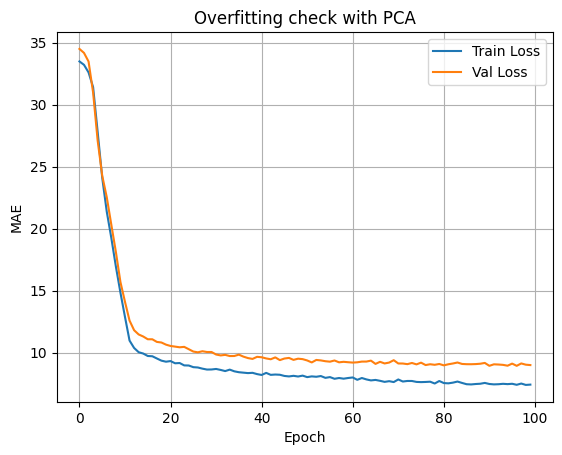

In [1118]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Overfitting check with PCA")
plt.show()


#### **Applying Cross-Validation**

In [1121]:
results_ann_cv_pca_sj = cross_validate_ann(X_train_PCA_sj, y_train_sj.astype(np.float32), model=modelAnn_PCA_sj, optimizer=optimizer_PCA_sj, criterion=criterion_PCA_sj, k_folds=10, batch_size=64)


Fold 1/10
MAE=8.9699, R²=0.9196

Fold 2/10
MAE=6.1100, R²=0.9631

Fold 3/10
MAE=13.1432, R²=0.8598

Fold 4/10
MAE=5.1869, R²=0.9676

Fold 5/10
MAE=5.5683, R²=0.8759

Fold 6/10
MAE=7.0121, R²=0.7462

Fold 7/10
MAE=4.0463, R²=0.9093

Fold 8/10
MAE=5.5619, R²=0.9430

Fold 9/10
MAE=5.5638, R²=0.9265

Fold 10/10
MAE=9.3065, R²=0.9459


In [1122]:
results_ann_cv_pca_sj

{'mae_mean': np.float64(7.0468937993049625),
 'mae_std': np.float64(2.5671382958664863),
 'r2_mean': np.float64(0.9056804716587067),
 'r2_std': np.float64(0.06260949068273107)}

In [1123]:
models_results["ANN + PCA for sj"] = [np.min(np.array(val_losses)), val_r2[np.argmin(np.array(val_losses))], results_ann_cv_pca_sj['r2_mean']]

### **For iq city**

### **Training**

In [1125]:
input_size = X_train_tensor_PCA_iq.shape[1]

In [1126]:
best_score = float("inf")
best_params = None
best_model = None

for hidden_size in param_grid["hidden_size"]:
    for lr in param_grid["lr"]:
        for wd in param_grid["weight_decay"]:

            print(f"Testing: hidden={hidden_size}, lr={lr}, wd={wd}")

            model = build_model(input_size, hidden_size)
            criterion = nn.L1Loss()
            optimizer = torch.optim.Adam(
                model.parameters(),
                lr=lr,
                weight_decay=wd
            )

            val_loss, val_r2 = train_model(
                model,
                train_loader_PCA_iq,
                val_loader_PCA_iq,
                criterion,
                optimizer,
                epochs=50
            )

            if val_loss < best_score:
                best_score = val_loss
                best_params = {
                    "hidden_size": hidden_size,
                    "lr": lr,
                    "weight_decay": wd
                }
                best_model = model

            print(f"→ Val MAE={val_loss:.4f}, R²={val_r2:.4f}")
print("Best configuration:")
print(best_params)
print("Best validation MAE:", best_score)


Testing: hidden=32, lr=0.001, wd=0.0
→ Val MAE=6.1853, R²=-0.0386
Testing: hidden=32, lr=0.001, wd=0.001
→ Val MAE=5.5989, R²=0.0029
Testing: hidden=32, lr=0.001, wd=0.01
→ Val MAE=5.7939, R²=0.0027
Testing: hidden=32, lr=0.0003, wd=0.0
→ Val MAE=5.1880, R²=0.0252
Testing: hidden=32, lr=0.0003, wd=0.001
→ Val MAE=5.5706, R²=0.0271
Testing: hidden=32, lr=0.0003, wd=0.01
→ Val MAE=5.3790, R²=0.0397
Testing: hidden=46, lr=0.001, wd=0.0
→ Val MAE=5.6679, R²=-0.0054
Testing: hidden=46, lr=0.001, wd=0.001
→ Val MAE=5.7748, R²=-0.0412
Testing: hidden=46, lr=0.001, wd=0.01
→ Val MAE=5.5655, R²=0.0296
Testing: hidden=46, lr=0.0003, wd=0.0
→ Val MAE=5.3942, R²=0.0203
Testing: hidden=46, lr=0.0003, wd=0.001
→ Val MAE=5.1203, R²=0.0353
Testing: hidden=46, lr=0.0003, wd=0.01
→ Val MAE=5.4681, R²=0.0280
Testing: hidden=64, lr=0.001, wd=0.0
→ Val MAE=5.9359, R²=-0.0198
Testing: hidden=64, lr=0.001, wd=0.001
→ Val MAE=5.7028, R²=0.0070
Testing: hidden=64, lr=0.001, wd=0.01
→ Val MAE=5.3946, R²=-0.0023

In [1127]:
modelAnn_PCA_iq = ANNModel(input_size=input_size, hidden_size=46)
criterion_PCA_iq = nn.L1Loss()
optimizer_PCA_iq = torch.optim.Adam(modelAnn_PCA_iq.parameters(), lr=0.0003, weight_decay=0.001)

In [1128]:
train_losses = []
val_losses = []
train_r2 = []
val_r2 = []
num_epochs = 100
for epoch in range(num_epochs):
    modelAnn_PCA_iq.train()
    running_loss = 0.0

    for inputs, targets in train_loader_PCA_iq:
        inputs = inputs.float()
        targets = targets.float().view(-1, 1)

        optimizer_PCA_iq.zero_grad()
        outputs = modelAnn_PCA_iq(inputs)
        loss = criterion_PCA_iq(outputs, targets)

        loss.backward()
        optimizer_PCA_iq.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_PCA_iq)
    train_losses.append(train_loss)
    _, train_r2_score = evaluate(modelAnn_PCA_iq, train_loader_PCA_iq, criterion_PCA_iq)
    train_r2.append(train_r2_score)

    val_loss, val_r2_score = evaluate(modelAnn_PCA_iq, val_loader_PCA_iq, criterion_PCA_iq)
    val_losses.append(val_loss)
    val_r2.append(val_r2_score)

    print(
        f"Epoch {epoch+1}: "
        f"Train Loss={train_loss:.4f}, "
        f"Val Loss={val_loss:.4f}, "
        f"Val R²={val_r2_score:.4f}"
    )


Epoch 1: Train Loss=7.7857, Val Loss=6.6766, Val R²=-0.5009
Epoch 2: Train Loss=7.5843, Val Loss=6.7155, Val R²=-0.4916
Epoch 3: Train Loss=7.7340, Val Loss=6.7340, Val R²=-0.4822
Epoch 4: Train Loss=7.4873, Val Loss=6.7524, Val R²=-0.4718
Epoch 5: Train Loss=7.5374, Val Loss=6.5593, Val R²=-0.4600
Epoch 6: Train Loss=7.7071, Val Loss=6.2321, Val R²=-0.4462
Epoch 7: Train Loss=7.3849, Val Loss=6.4514, Val R²=-0.4295
Epoch 8: Train Loss=7.2702, Val Loss=6.1488, Val R²=-0.4096
Epoch 9: Train Loss=7.1232, Val Loss=6.3983, Val R²=-0.3860
Epoch 10: Train Loss=7.1497, Val Loss=6.2981, Val R²=-0.3590
Epoch 11: Train Loss=7.0725, Val Loss=6.2985, Val R²=-0.3269
Epoch 12: Train Loss=6.9079, Val Loss=5.8345, Val R²=-0.2905
Epoch 13: Train Loss=7.3074, Val Loss=5.9707, Val R²=-0.2515
Epoch 14: Train Loss=6.5442, Val Loss=5.8063, Val R²=-0.2120
Epoch 15: Train Loss=6.2493, Val Loss=5.6730, Val R²=-0.1722
Epoch 16: Train Loss=6.2661, Val Loss=5.5918, Val R²=-0.1361
Epoch 17: Train Loss=6.2716, Val 

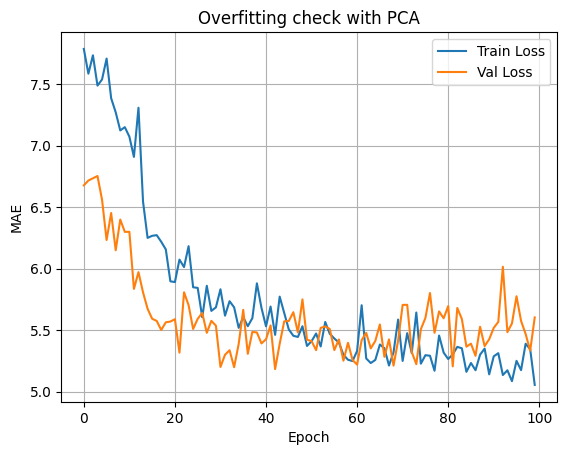

In [1129]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.grid()
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Overfitting check with PCA")
plt.show()


In [1130]:
results_ann_cv_pca_iq = cross_validate_ann(X_train_PCA_iq, y_train_iq.astype(np.float32), model=modelAnn_PCA_iq, optimizer=optimizer_PCA_iq, criterion=criterion_PCA_iq, k_folds=10, batch_size=64)


Fold 1/10
MAE=6.7549, R²=-0.0529

Fold 2/10
MAE=3.4720, R²=0.2538

Fold 3/10
MAE=3.8663, R²=0.2952

Fold 4/10
MAE=3.0499, R²=0.4625

Fold 5/10
MAE=7.2220, R²=0.1077

Fold 6/10
MAE=3.0793, R²=0.4361

Fold 7/10
MAE=4.7069, R²=0.2759

Fold 8/10
MAE=2.0991, R²=0.5224

Fold 9/10
MAE=4.6864, R²=0.2330

Fold 10/10
MAE=2.7033, R²=0.6426


In [1131]:
results_ann_cv_pca_iq

{'mae_mean': np.float64(4.164016890525818),
 'mae_std': np.float64(1.6128990380474646),
 'r2_mean': np.float64(0.317625492811203),
 'r2_std': np.float64(0.19426503203545267)}

In [1138]:
models_results["ANN + PCA for iq"] = [np.min(np.array(val_losses)), val_r2[np.argmin(np.array(val_losses))], results_ann_cv_pca_iq['r2_mean']]

# **Results of each model**

In [ ]:
del models_results["MLP Regressor for sj"]
del models_results["MLP Regressor for iq"]
del models_results["XGBoost"]
results_df = pd.DataFrame(models_results)
results_df.insert(0, "Metrics", ['MAE','r2_score', 'r2_score_cross_validation'])
results_df.drop(0)
results_df

,Metrics,Gradient boosting for sj,Gradient boosting for iq,XGBoost for sj,XGBoost for iq,Random forest for sj,Random forest for iq,ANN for sj,ANN for iq,MLP Regressor sj,MLP Regressor iq,MLP Regressor + PCA for sj,MLP Regressor + PCA for iq,ANN + PCA for sj,ANN + PCA for iq
0,MAE,8.195515,3.860350,8.193484,4.472073,8.108014,3.972095,7.924500,3.868660,8.285651,5.002133,8.819729,5.718133,8.948260,5.182581
1,r2_score,0.927074,0.507957,0.923175,0.041135,0.915019,0.350530,0.931454,0.370155,0.929610,-0.139102,0.910156,-0.185822,0.892704,0.031536
2,r2_score_cross_validation,87.787211,54.814627,88.413888,50.931050,87.115586,52.674794,0.957057,0.808096,88.289547,-94.857468,83.602054,-25.167988,0.905680,0.317625
